<a href="https://colab.research.google.com/github/wcrowley342/tourdefancedata/blob/main/TourDeFranceAnalysis_JustCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading In Libraries and Data

In [ ]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
import seaborn as sns
sns.set_context("notebook", font_scale=1.25)
import plotly as py
import plotly.express as px

#Read in data into "rider_df" data frame
#https://github.com/camminady/LeTourDataSet/blob/master/README.md

rider_df = pd.read_csv('https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv')

#Lets inspect or visualize first 5 rows of data using the .head method 

rider_df.head()

Unnamed: 0  Year                  Rider  ...  Points NumberStages  ListedAvgPace
0           0  1903          MAURICE GARIN  ...     NaN          6.0         25.679
1           1  1903         LUCIEN POTHIER  ...     NaN          6.0         25.679
2           2  1903       FERNAND AUGEREAU  ...     NaN          6.0         25.679
3           3  1903        RODOLPHE MULLER  ...     NaN          6.0         25.679
4           4  1903  JEAN-BAPTISTE FISCHER  ...     NaN          6.0         25.679

[5 rows x 18 columns]

In [ ]:
print(rider_df.shape)

(9452, 18)


In [ ]:
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9452 non-null   int64  
 1   Year               9452 non-null   int64  
 2   Rider              9452 non-null   object 
 3   Rank               9452 non-null   int64  
 4   Time               9255 non-null   object 
 5   DistanceKilometer  9452 non-null   float64
 6   PersonalAvgPace    9255 non-null   float64
 7   Hours              9255 non-null   float64
 8   Minutes            9255 non-null   float64
 9   Seconds            9255 non-null   float64
 10  Team               9452 non-null   object 
 11  RiderNumber        9452 non-null   int64  
 12  TotalSeconds       9255 non-null   float64
 13  Gap                9255 non-null   object 
 14  Bonus              164 non-null    object 
 15  Points             197 non-null    float64
 16  NumberStages       9452 

In [ ]:
rider_df.describe()

Unnamed: 0         Year  ...  NumberStages  ListedAvgPace
count  9452.000000  9452.000000  ...   9452.000000    9151.000000
mean   4725.500000  1981.128862  ...     21.352730      36.589313
std    2728.701706    29.744678  ...      2.311157       4.255119
min       0.000000  1903.000000  ...      6.000000      24.056000
25%    2362.750000  1962.000000  ...     21.000000      34.906000
50%    4725.500000  1988.000000  ...     21.000000      38.059000
75%    7088.250000  2005.000000  ...     23.000000      39.788000
max    9451.000000  2020.000000  ...     26.000000      41.654000

[8 rows x 13 columns]

#Cleaning the Data

In [ ]:
rider_df = rider_df.iloc[: , 1:]
rider_df = rider_df.drop(["Bonus", "Points"], axis=1)
rider_df['DistanceKilometer'] = rider_df['DistanceKilometer'] / 1.609
rider_df = rider_df.rename(columns={'NumberStages': 'Number of Stages', 'DistanceKilometer': 'Distance in Miles'})

rider_df.head(10)

Year                      Rider  ...  Number of Stages ListedAvgPace
0  1903              MAURICE GARIN  ...               6.0        25.679
1  1903             LUCIEN POTHIER  ...               6.0        25.679
2  1903           FERNAND AUGEREAU  ...               6.0        25.679
3  1903            RODOLPHE MULLER  ...               6.0        25.679
4  1903      JEAN-BAPTISTE FISCHER  ...               6.0        25.679
5  1903               MARCEL KERFF  ...               6.0        25.679
6  1903  DIT SAMSON JULIEN LOOTENS  ...               6.0        25.679
7  1903           GEORGES PASQUIER  ...               6.0        25.679
8  1903        FRANÇOIS BEAUGENDRE  ...               6.0        25.679
9  1903              ALOIS CATTEAU  ...               6.0        25.679

[10 rows x 15 columns]

In [ ]:
rider_df['Team'].value_counts()[:10]

FRANCE                 193
BELGIQUE               170
TOURISTES ROUTIERS     151
ITALIE                 150
TOURISTES-ROUTIERS     123
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
Name: Team, dtype: int64

In [ ]:
rider_df['Team'].replace(['TOURISTES ROUTIERS'],'TOURISTES-ROUTIERS', inplace = True)
rider_df['Team'].value_counts()[:10]

TOURISTES-ROUTIERS     274
FRANCE                 193
BELGIQUE               170
ITALIE                 150
ISOLES                 116
RABOBANK               102
AG2R LA MONDIALE        91
EUSKALTEL - EUSKADI     90
ESPAGNE                 82
BANESTO                 77
Name: Team, dtype: int64

# Explorator Data Analysis (EDA)

At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data.

In [ ]:
number_riders = rider_df.groupby('Year').Year.count()
number_riders

Year
1903     21
1904     15
1905     24
1906     14
1907     33
       ... 
2016    174
2017    167
2018    145
2019    155
2020    146
Name: Year, Length: 107, dtype: int64

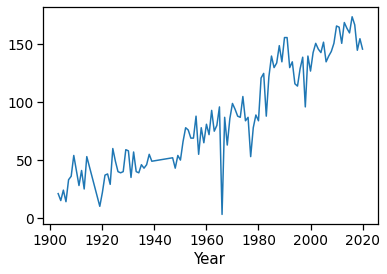

In [ ]:
rider_df.groupby(['Year'])['Rank'].count().plot()

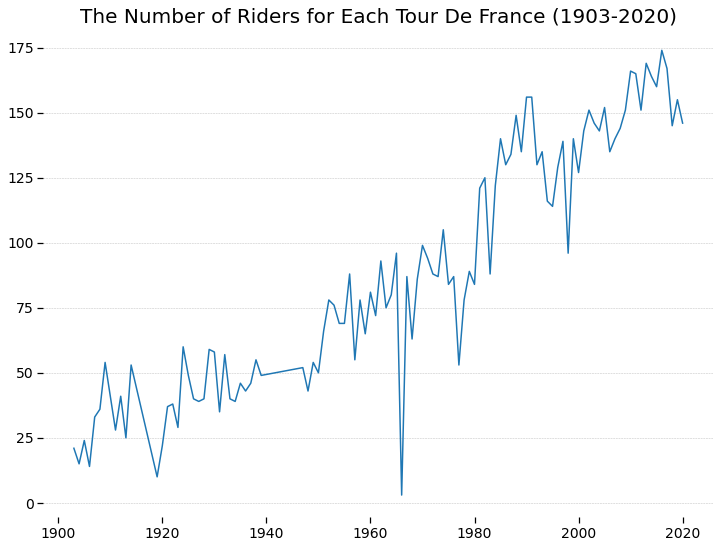

In [ ]:
plt.figure(figsize=(12,9))
x_values = rider_df.Year.unique()  
y_values = number_riders
title = ('The Number of Riders for Each Tour De France (1903-2020)')
plt.title(title, fontsize=20)
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.tick_params(axis='both', labelsize=14) 
sns.despine(left=True, bottom=True) 
plt.plot(x_values, y_values)
plt.show()

In [ ]:
number_riders[46:56]

Year
1960    81
1961    72
1962    93
1963    75
1964    80
1965    96
1966     3
1967    87
1968    63
1969    86
Name: Year, dtype: int64

In [ ]:
rider_df['Rider'].value_counts()[:10]

SYLVAIN CHAVANEL     16
STUART O'GRADY       15
JOOP ZOETEMELK       15
THOMAS VOECKLER      15
LUCIEN VAN IMPE      15
VJATCESLAV EKIMOV    15
HAIMAR ZUBELDIA      15
JENS VOIGT           14
GUY NULENS           13
GEORGE HINCAPIE      13
Name: Rider, dtype: int64

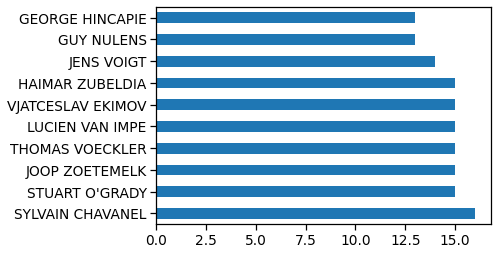

In [ ]:
rider_df['Rider'].value_counts()[:10].plot(kind='barh')

In [ ]:
winners_list = rider_df.loc[(rider_df['Rank'] == 1)]
print(winners_list)

      Year                          Rider  ...  Number of Stages ListedAvgPace
0     1903                  MAURICE GARIN  ...               6.0        25.679
21    1904   HENRI CORNET (GEBOREN JARDY)  ...               6.0        25.265
36    1905              LOUIS TROUSSELIER  ...              11.0        27.107
60    1906                   RENÉ POTTIER  ...              13.0        24.463
74    1907  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.470
...    ...                            ...  ...               ...           ...
8665  2016                   CHRIS FROOME  ...              21.0        39.571
8839  2017                   CHRIS FROOME  ...              21.0        40.995
9006  2018                 GERAINT THOMAS  ...              21.0        40.206
9151  2019              EGAN BERNAL GOMEZ  ...              21.0           NaN
9306  2020                  TADEJ POGACAR  ...              21.0           NaN

[100 rows x 15 columns]


In [ ]:
winners_list.head()

Year                          Rider  ...  Number of Stages ListedAvgPace
0   1903                  MAURICE GARIN  ...               6.0        25.679
21  1904   HENRI CORNET (GEBOREN JARDY)  ...               6.0        25.265
36  1905              LOUIS TROUSSELIER  ...              11.0        27.107
60  1906                   RENÉ POTTIER  ...              13.0        24.463
74  1907  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.470

[5 rows x 15 columns]

In [ ]:
winners_list = winners_list.reset_index(drop=True)

winners_list

Year                          Rider  ...  Number of Stages ListedAvgPace
0   1903                  MAURICE GARIN  ...               6.0        25.679
1   1904   HENRI CORNET (GEBOREN JARDY)  ...               6.0        25.265
2   1905              LOUIS TROUSSELIER  ...              11.0        27.107
3   1906                   RENÉ POTTIER  ...              13.0        24.463
4   1907  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.470
..   ...                            ...  ...               ...           ...
95  2016                   CHRIS FROOME  ...              21.0        39.571
96  2017                   CHRIS FROOME  ...              21.0        40.995
97  2018                 GERAINT THOMAS  ...              21.0        40.206
98  2019              EGAN BERNAL GOMEZ  ...              21.0           NaN
99  2020                  TADEJ POGACAR  ...              21.0           NaN

[100 rows x 15 columns]

In [ ]:
rider_df.sort_values('PersonalAvgPace')[0:10]

Year                 Rider  ...  Number of Stages ListedAvgPace
35   1904   ANTOINE DEFLOTRIERE  ...               6.0        25.265
20   1903     ARSÈNE MILLOCHEAU  ...               6.0        25.679
19   1903       PIERRE DESVAGES  ...               6.0        25.679
34   1904  NICOLAS DAMELINCOURT  ...               6.0        25.265
18   1903         GEORGES BOROT  ...               6.0        25.679
17   1903          EMILE MOULIN  ...               6.0        25.679
384  1914         HENRI LECLERC  ...              15.0        26.835
416  1920      CHARLES RABOISON  ...              15.0        24.072
491  1922         DANIEL MASSON  ...              15.0        24.196
33   1904          AUGUSTE RIST  ...               6.0        25.265

[10 rows x 15 columns]

In [ ]:
# "slowest" winners

winners_list.sort_values('PersonalAvgPace')

Year                          Rider  ...  Number of Stages ListedAvgPace
521  1924             OTTAVIO BOTTECCHIA  ...              15.0        24.250
385  1919                  FIRMIN LAMBOT  ...              15.0        24.056
630  1926                  LUCIEN BUYSSE  ...              17.0        24.273
395  1920                  PHILIPPE THYS  ...              15.0        24.072
454  1922                  FIRMIN LAMBOT  ...              15.0        24.196
..    ...                            ...  ...               ...           ...
74   1907  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.470
143  1909                 FRANÇOIS FABER  ...              14.0        28.658
197  1910                  OCTAVE LAPIZE  ...              15.0        29.099
238  1911               GUSTAVE GARRIGOU  ...              15.0        27.322
266  1912                 ODIEL DEFRAEYE  ...              15.0        27.763

[100 rows x 15 columns]

In [ ]:
winners_list.sort_values('PersonalAvgPace', ascending=False)

Year                          Rider  ...  Number of Stages ListedAvgPace
2   1905              LOUIS TROUSSELIER  ...              11.0        27.107
3   1906                   RENÉ POTTIER  ...              13.0        24.463
5   1908  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.740
90  2011                    CADEL EVANS  ...              21.0        39.788
84  1998                  MARCO PANTANI  ...              22.0        39.983
..   ...                            ...  ...               ...           ...
4   1907  LUCIEN MAZAN DIT PETIT-BRETON  ...              14.0        28.470
6   1909                 FRANÇOIS FABER  ...              14.0        28.658
7   1910                  OCTAVE LAPIZE  ...              15.0        29.099
8   1911               GUSTAVE GARRIGOU  ...              15.0        27.322
9   1912                 ODIEL DEFRAEYE  ...              15.0        27.763

[100 rows x 15 columns]

In [ ]:
winners_df.size

2014

In [ ]:
winners_df.info

<bound method DataFrame.info of      edition  start_date  ... birth_country     nationality
0          1  1903-07-01  ...         Italy          France
1          2  1904-07-02  ...        France          France
2          3  1905-07-09  ...        France          France
3          4  1906-07-04  ...        France          France
4          5  1907-07-08  ...        France          France
..       ...         ...  ...           ...             ...
101      102  2015-07-04  ...         Kenya   Great Britain
102      103  2016-07-02  ...         Kenya   Great Britain
103      104  2017-07-01  ...         Kenya   Great Britain
104      105  2018-07-07  ...         Wales   Great Britain
105      106  2019-07-06  ...      Columbia        Colombia

[106 rows x 19 columns]>


# Merging DataFrames & Additional Analysis

In [ ]:
rider_df.head()

Year                  Rider  ...  Number of Stages ListedAvgPace
0  1903          MAURICE GARIN  ...               6.0        25.679
1  1903         LUCIEN POTHIER  ...               6.0        25.679
2  1903       FERNAND AUGEREAU  ...               6.0        25.679
3  1903        RODOLPHE MULLER  ...               6.0        25.679
4  1903  JEAN-BAPTISTE FISCHER  ...               6.0        25.679

[5 rows x 15 columns]

In [ ]:
#Create the columns/variables needed for the visualization by aggregating on the years with groupby method

year = np.unique(rider_df["Year"])
distance = rider_df.groupby("Year").agg("mean")["Distance in Miles"].values
nriders = rider_df.groupby("Year").agg("count")["Rider"]
winnerpace =   rider_df.groupby("Year").first()["PersonalAvgPace"]
winner = rider_df.groupby("Year").first()["Rider"]
meantime =  rider_df.groupby("Year").agg("mean")["TotalSeconds"]
meanpace =  distance/meantime*3600

In [ ]:
# Create the arrays for the above columns/variables 

array_year = np.array(year)
array_distance = np.array(distance)
array_winnerpace = np.array(winnerpace)
array_winner = np.array(winner)
array_meantime = np.array(meantime)
array_meanpace = np.array(meanpace)

In [ ]:
#construct the new dataframe - df2 - from a dictionary

data = {'Year': array_year, 'distance (miles)': array_distance, 'winnerpace': array_winnerpace, 'Rider': array_winner, 'meantime': array_meantime, 'meanpace': array_meanpace}
df2 = pd.DataFrame(data)
df2.fillna(0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              107 non-null    int64  
 1   distance (miles)  107 non-null    float64
 2   winnerpace        107 non-null    float64
 3   Rider             107 non-null    object 
 4   meantime          107 non-null    float64
 5   meanpace          107 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.1+ KB


In [ ]:
df2.head()

Year  distance (miles)  ...       meantime   meanpace
0  1903       1509.011809  ...  414368.428571  13.110175
1  1904       1509.011809  ...  441867.733333  12.294273
2  1905       1860.783095  ...       0.000000        inf
3  1906       2881.914232  ...       0.000000        inf
4  1907       2789.310131  ...       0.000000   0.000000

[5 rows x 6 columns]

In [ ]:
winners_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
winners_df.head(10)

edition  start_date  ... birth_country  nationality
0        1  1903-07-01  ...         Italy       France
1        2  1904-07-02  ...        France       France
2        3  1905-07-09  ...        France       France
3        4  1906-07-04  ...        France       France
4        5  1907-07-08  ...        France       France
5        6  1908-07-13  ...        France       France
6        7  1909-07-05  ...        France   Luxembourg
7        8  1910-07-01  ...        France       France
8        9  1911-07-02  ...        France       France
9       10  1912-06-30  ...       Belgium      Belgium

[10 rows x 19 columns]

In [ ]:
winners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

In [ ]:
#clean the winners dataframe

winners_df = winners_df.iloc[: , 1:]
winners_df = winners_df.drop(["distance","born","died","full_name","birth_town","birth_country"], axis=1)
winners_df = winners_df.rename(columns={'start_date': 'Year', 'winner_name': 'Rider', "height":"height(meters)"})
winners_df['weight(lbs)'] = winners_df['weight'] * 2.205

#map the winners dataframe to the original, riders dataframe

winners_df.Year = winners_df.Year.str[:4]
winners_df["Rider"]= winners_df["Rider"].str.upper()
winners_df = winners_df.astype({"Year": int})
winners_df = winners_df.drop(['weight'], axis=1)
winners_df.head()


Year                Rider  ... nationality  weight(lbs)
0  1903        MAURICE GARIN  ...      France        132.3
1  1904         HENRI CORNET  ...      France          NaN
2  1905    LOUIS TROUSSELIER  ...      France          NaN
3  1906         RENÉ POTTIER  ...      France          NaN
4  1907  LUCIEN PETIT-BRETON  ...      France          NaN

[5 rows x 12 columns]

In [ ]:
winners_df.head()

Year                Rider  ... nationality  weight(lbs)
0  1903        MAURICE GARIN  ...      France        132.3
1  1904         HENRI CORNET  ...      France          NaN
2  1905    LOUIS TROUSSELIER  ...      France          NaN
3  1906         RENÉ POTTIER  ...      France          NaN
4  1907  LUCIEN PETIT-BRETON  ...      France          NaN

[5 rows x 12 columns]

In [ ]:
df2.head()

Year  distance (miles)  ...       meantime   meanpace
0  1903       1509.011809  ...  414368.428571  13.110175
1  1904       1509.011809  ...  441867.733333  12.294273
2  1905       1860.783095  ...       0.000000        inf
3  1906       2881.914232  ...       0.000000        inf
4  1907       2789.310131  ...       0.000000   0.000000

[5 rows x 6 columns]

In [ ]:
#clean the winners dataframe

winners_df = winners_df.iloc[: , 1:]
winners_df = winners_df.drop(["distance","born","died","full_name","birth_town","birth_country"], axis=1)
winners_df = winners_df.rename(columns={'start_date': 'Year', 'winner_name': 'Rider', "height":"height(meters)"})
winners_df['weight(lbs)'] = winners_df['weight'] * 2.205

winners_df.head()


Year                Rider  ... nationality  weight(lbs)
0  1903-07-01        Maurice Garin  ...      France        132.3
1  1904-07-02         Henri Cornet  ...      France          NaN
2  1905-07-09    Louis Trousselier  ...      France          NaN
3  1906-07-04         René Pottier  ...      France          NaN
4  1907-07-08  Lucien Petit-Breton  ...      France          NaN

[5 rows x 13 columns]

In [ ]:
#map the winners dataframe to the original, riders dataframe

winners_df.Year = winners_df.Year.str[:4]
winners_df["Rider"]= winners_df["Rider"].str.upper()
winners_df = winners_df.astype({"Year": int})
winners_df = winners_df.drop(['weight'], axis=1)
winners_df.head()

Year                Rider  ... nationality  weight(lbs)
0  1903        MAURICE GARIN  ...      France        132.3
1  1904         HENRI CORNET  ...      France          NaN
2  1905    LOUIS TROUSSELIER  ...      France          NaN
3  1906         RENÉ POTTIER  ...      France          NaN
4  1907  LUCIEN PETIT-BRETON  ...      France          NaN

[5 rows x 12 columns]

In [ ]:
winners_df['nationality'].value_counts()[:10]

 France           36
 Belgium          18
 Spain            12
 United States    10
 Italy            10
 Great Britain     6
 Luxembourg        5
  Switzerland      2
 Netherlands       2
 Germany           1
Name: nationality, dtype: int64

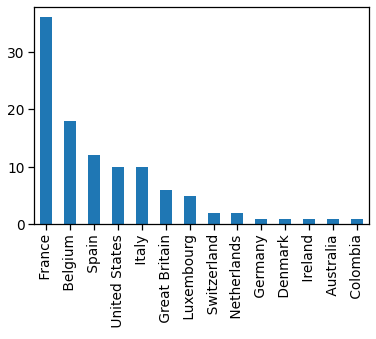

In [ ]:
winners_df['nationality'].value_counts().plot(kind='bar');

In [ ]:
df2.head()

Year  distance (miles)  ...       meantime   meanpace
0  1903       1509.011809  ...  414368.428571  13.110175
1  1904       1509.011809  ...  441867.733333  12.294273
2  1905       1860.783095  ...       0.000000        inf
3  1906       2881.914232  ...       0.000000        inf
4  1907       2789.310131  ...       0.000000   0.000000

[5 rows x 6 columns]

In [ ]:
#merge the two dataframes, how = inner by default

merged_df = pd.merge(df2,winners_df,on='Year', how="outer" )
merged_df = merged_df.rename(columns={'Rider_x': 'Winner'})
merged_df = merged_df.drop(['Rider_y'], axis=1)
merged_df.head(10)

Year  distance (miles)  ...  nationality weight(lbs)
0  1903       1509.011809  ...       France      132.30
1  1904       1509.011809  ...       France         NaN
2  1905       1860.783095  ...       France         NaN
3  1906       2881.914232  ...       France         NaN
4  1907       2789.310131  ...       France         NaN
5  1908       2789.310131  ...       France         NaN
6  1909       2794.903667  ...   Luxembourg      194.04
7  1910       2942.200124  ...       France         NaN
8  1911       3320.696085  ...       France         NaN
9  1912       3287.134866  ...      Belgium         NaN

[10 rows x 16 columns]

In [ ]:
#average age of winners by nationality, sorted by age

average_age_of_winners_by_nation = merged_df.groupby('nationality').agg({'age':[np.size, np.mean]})
average_age_of_winners_by_nation.sort_values([('age', 'mean')],ascending=False)

age           
                size       mean
nationality                    
 Australia       1.0  34.000000
 Denmark         1.0  32.000000
 Great Britain   6.0  30.833333
 Netherlands     2.0  30.500000
 United States  10.0  29.200000
 Italy          10.0  28.300000
 Spain          12.0  28.083333
 Belgium        18.0  28.000000
  Switzerland    2.0  28.000000
 Ireland         1.0  27.000000
 France         36.0  26.527778
 Luxembourg      5.0  25.400000
 Germany         1.0  23.000000
 Colombia        1.0  22.000000

Text(0.5, 1.0, 'Distribution of ages of winners')

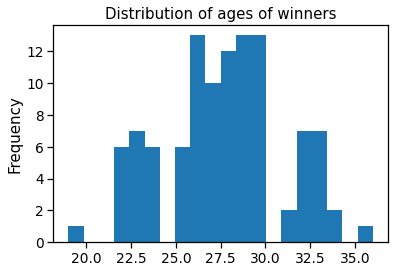

In [ ]:
merged_df.age.plot.hist(bins=20)
plt.title("Distribution of ages of winners")

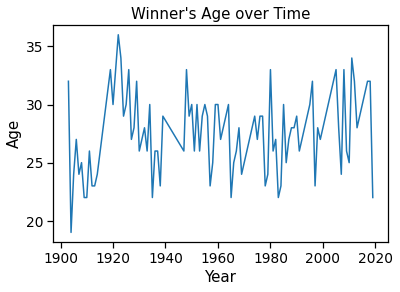

In [ ]:
fig = plt.figure()
ax = plt.axes()

plt.title("Winner's Age over Time")
plt.xlabel("Year")
plt.ylabel("Age");

ax.plot(merged_df['Year'],merged_df['age']);

In [ ]:
merged_df.groupby(['nationality']).mean()

Year  distance (miles)  ...        age  weight(lbs)
nationality                                    ...                        
 Australia      2011.000000       2256.059664  ...  34.000000   141.120000
 Belgium        1939.888889       2964.367102  ...  28.000000   157.290000
 Colombia       2019.000000       2091.982598  ...  22.000000   132.300000
 Denmark        1996.000000       2339.962710  ...  32.000000   156.555000
 France         1947.305556       2648.694842  ...  26.527778   148.347500
 Germany        1997.000000       2454.940957  ...  23.000000   160.965000
 Great Britain  2015.166667       2140.977833  ...  30.833333   152.880000
 Ireland        1987.000000       2629.583592  ...  27.000000   163.170000
 Italy          1957.300000       2864.014916  ...  28.300000   145.215000
 Luxembourg     1946.400000       2900.186451  ...  25.400000   161.700000
 Netherlands    1974.000000       2589.807334  ...  30.500000   149.940000
 Spain          1992.916667       2341.205718  ...  28.083333   153.949091
 United States  1997.900000       2210.192666  ...  29.200000   160.083000
  Switzerland   1950.500000       2940.646364  ...  28.000000          NaN

[14 rows x 12 columns]

In [46]:
#create a count and group by nationality, team

merged_df['count']=1
merged_df.groupby(['nationality','winner_team']).count()['count']

nationality     winner_team                      
 Australia      BMC Racing Team                       1
 Belgium        Alcyon–Dunlop                         2
                Automoto–Hutchinson                   1
                Belgium                               3
                Faema                                 1
                Faemino–Faema                         1
                Gitane–Campagnolo                     1
                La Sportive                           3
                Molteni                               3
                Peugeot–Wolber                        3
 Colombia       Team Ineos                            1
 Denmark        Team Telekom                          1
 France         Alcyon–Dunlop                         3
                Automoto–Hutchinson                   1
                Conte                                 1
                Ford France–Hutchinson                1
                France                               1

# Graphs & Visual Analysis

**Simple time series graph of the winners avg pace each year**

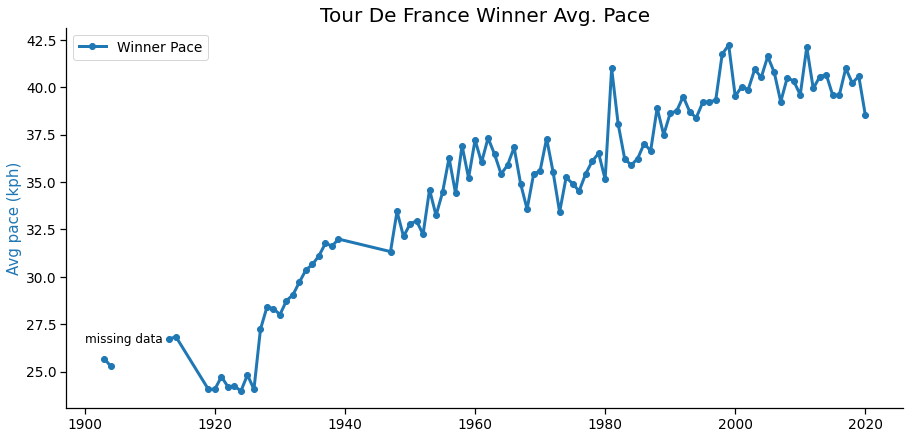

In [47]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3, label = 'Winner Pace')
ax.set_ylabel("Avg pace (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
ax.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 360
sns.despine()

z = np.polyfit(year, winnerpace, 1)
p = np.poly1d(z)

#add annotation
ax.text(1900.000000, 26.5, "missing data", size=12)

fig.show()

**Comparing Distance to Pace over time** (multiple axes on a single plot)

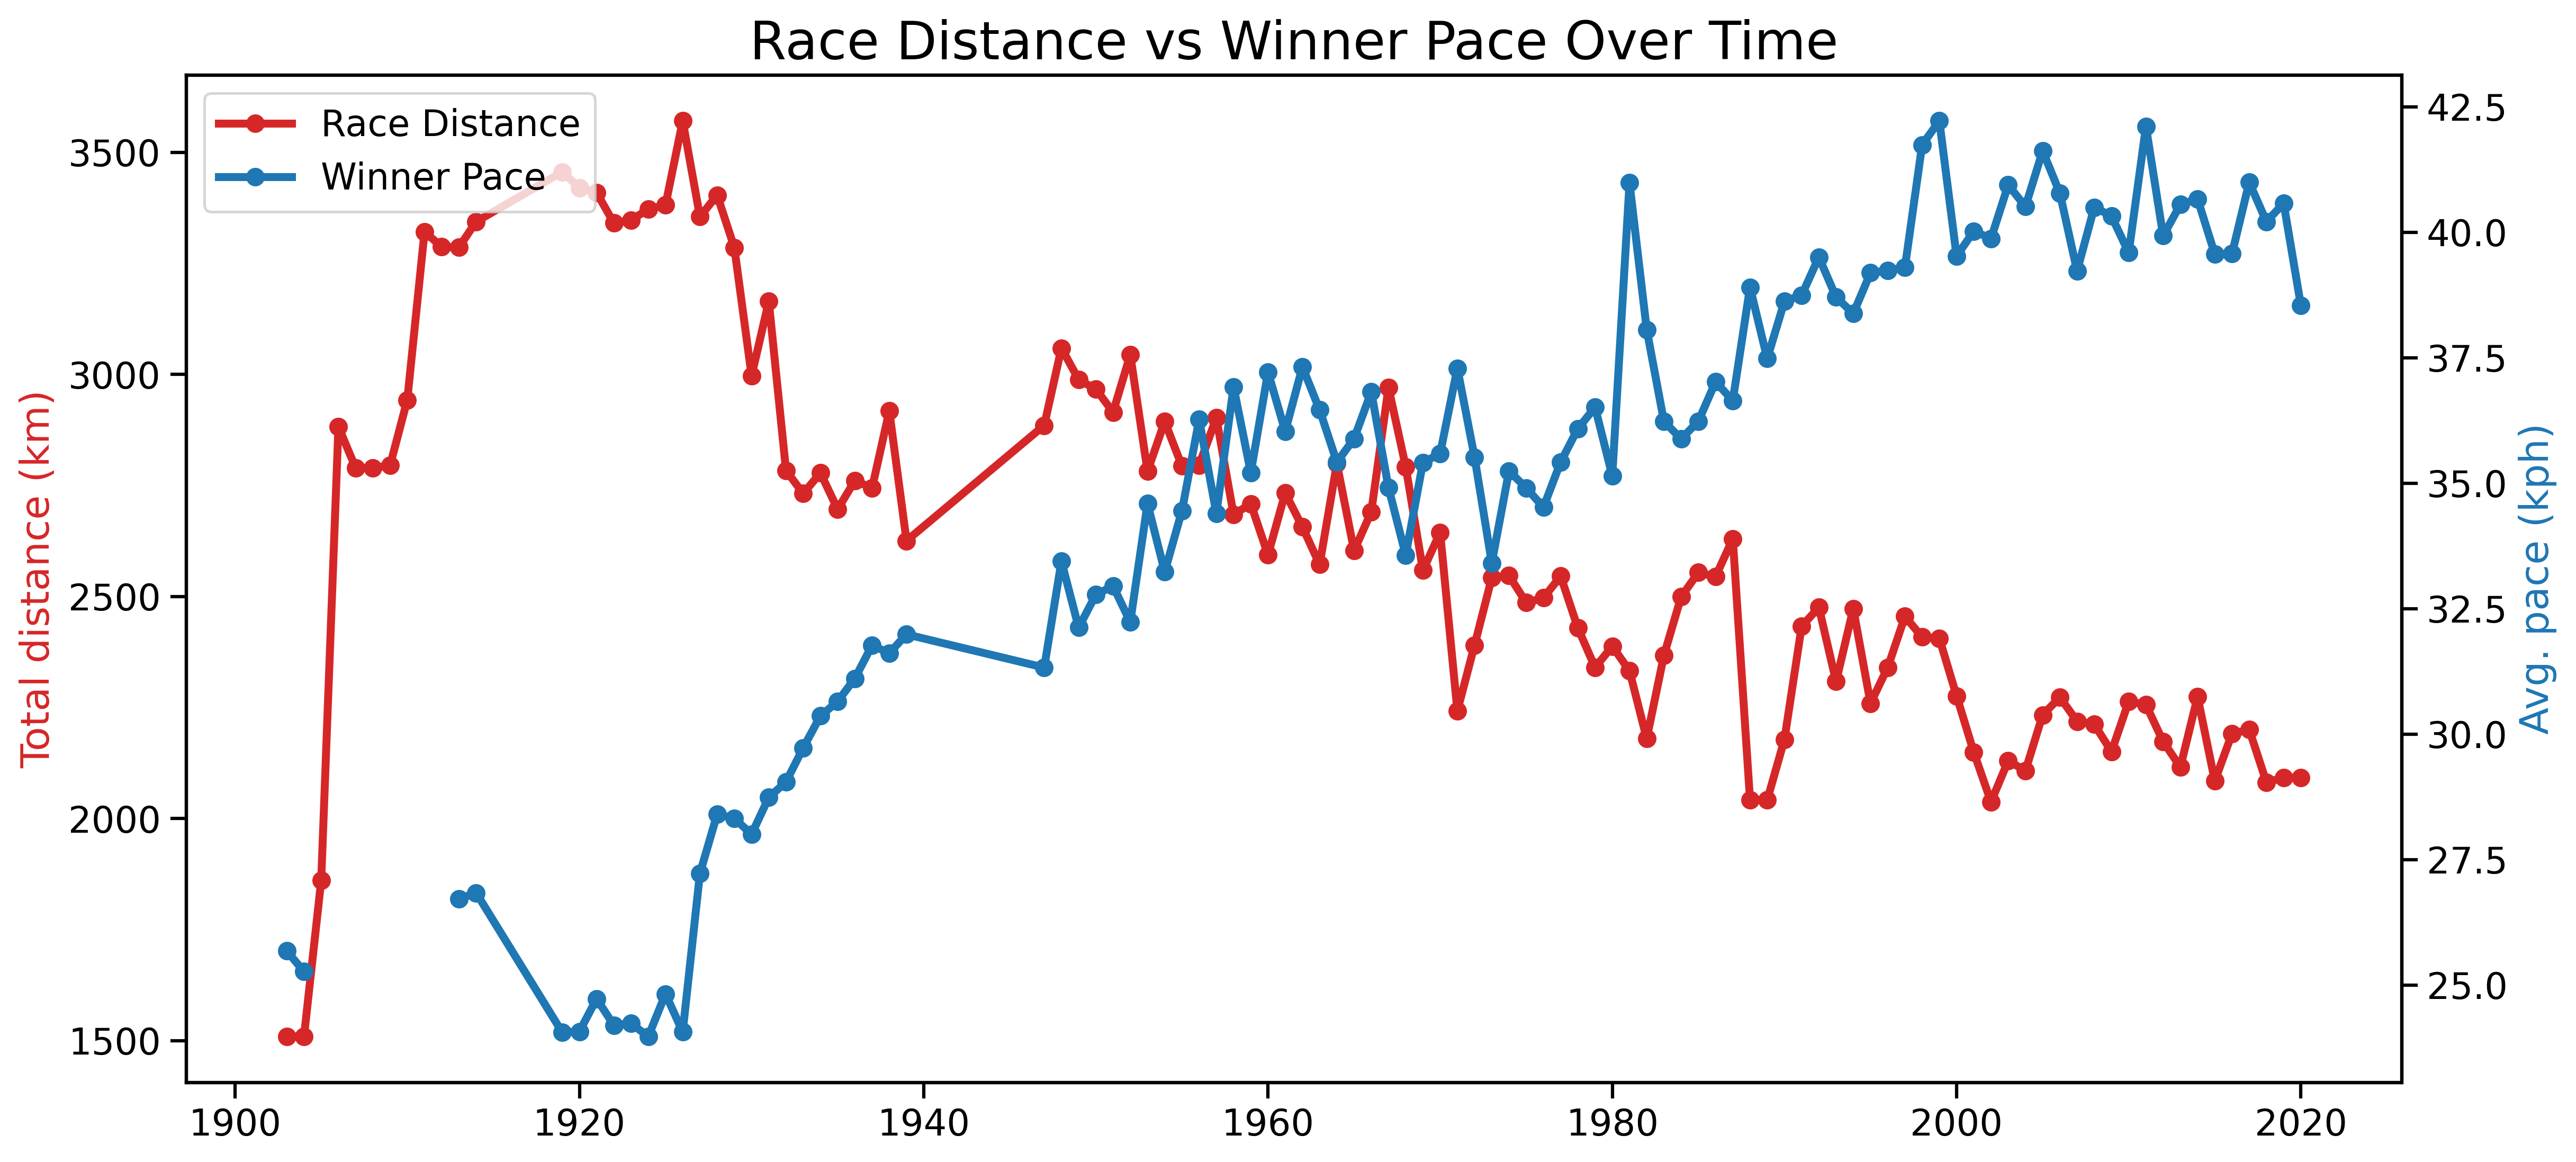

In [48]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,distance,"-o", color = "tab:red", lw = 3, label='Race Distance')
ax.set_ylabel("Total distance (km)",fontsize = 15,color = "tab:red")

ax2 = ax.twinx()
ax2.plot(year,winnerpace,"-o",color = "tab:blue",lw = 3,label='Winner Pace')
ax2.set_ylabel("Avg. pace (kph)",fontsize = 15,color = "tab:blue")
#ax.grid("on")
ax.set_title("Race Distance vs Winner Pace Over Time",fontsize=20)

#handling of label consolidation
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left');

**Bar chart of all - and repeat - winners**

Helpful resource: https://pythonbasics.org/matplotlib-bar-chart/

This bar chart shows riders who have won the tour de france by number of wins

In [ ]:
merged_df['Winner'].value_counts()

BERNARD HINAULT        5
JACQUES ANQUETIL       5
MIGUEL INDURAIN        5
EDDY MERCKX            5
JAN ULLRICH            4
                      ..
VINCENZO NIBALI        1
BRADLEY WIGGINS        1
GEORGES SPEICHER       1
FEDERICO BAHAMONTES    1
LUCIEN BUYSSE          1
Name: Winner, Length: 67, dtype: int64

Text(0, 0.5, 'Number of Wins')

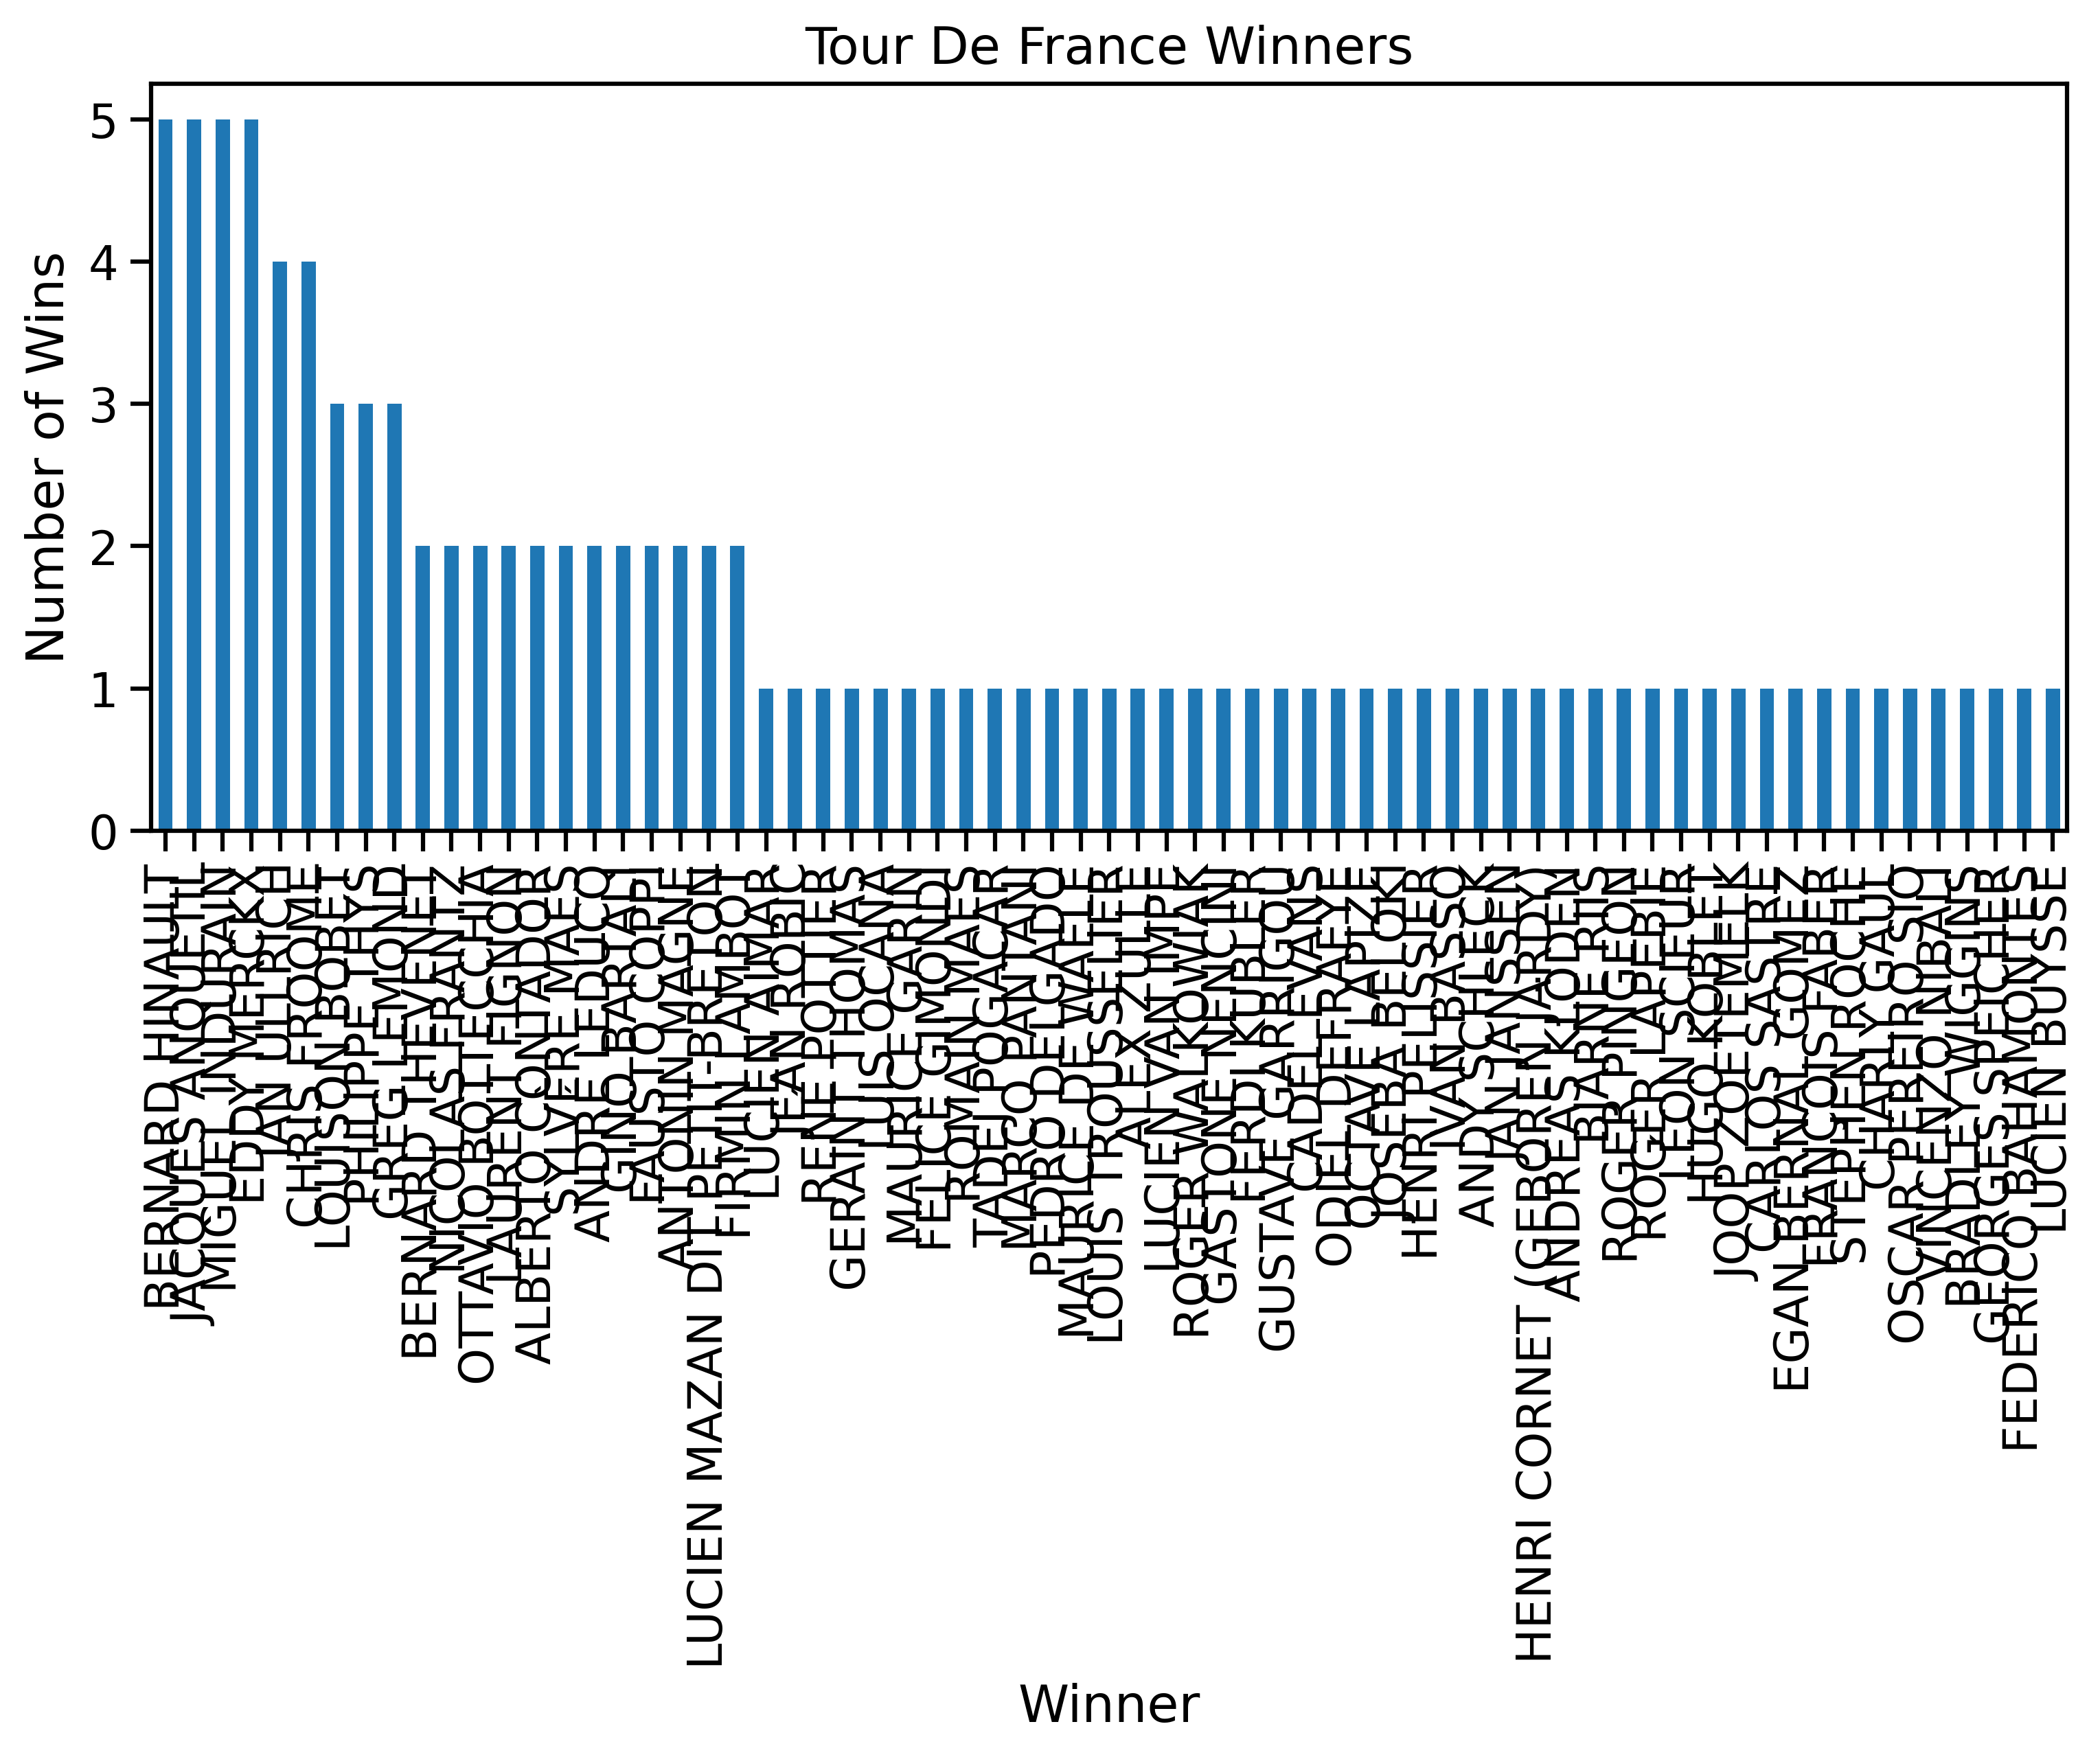

In [ ]:
ax = merged_df['Winner'].value_counts().plot(kind='bar',
                                        figsize=(10,4),
                                        title="Tour De France Winners")
ax.set_xlabel("Winner")
ax.set_ylabel("Number of Wins")

In [ ]:
merged_df['Winner'].value_counts().loc[lambda x : x>1]

BERNARD HINAULT                  5
JACQUES ANQUETIL                 5
MIGUEL INDURAIN                  5
EDDY MERCKX                      5
JAN ULLRICH                      4
CHRIS FROOME                     4
LOUISON BOBET                    3
PHILIPPE THYS                    3
GREG LEMOND                      3
BERNARD THEVENET                 2
NICOLAS FRANTZ                   2
OTTAVIO BOTTECCHIA               2
LAURENT FIGNON                   2
ALBERTO CONTADOR                 2
SYLVÈRE MAES                     2
ANDRÉ LEDUCQ                     2
GINO BARTALI                     2
FAUSTO COPPI                     2
ANTONIN MAGNE                    2
LUCIEN MAZAN DIT PETIT-BRETON    2
FIRMIN LAMBOT                    2
Name: Winner, dtype: int64

Text(0, 0.5, 'Number of Wins')

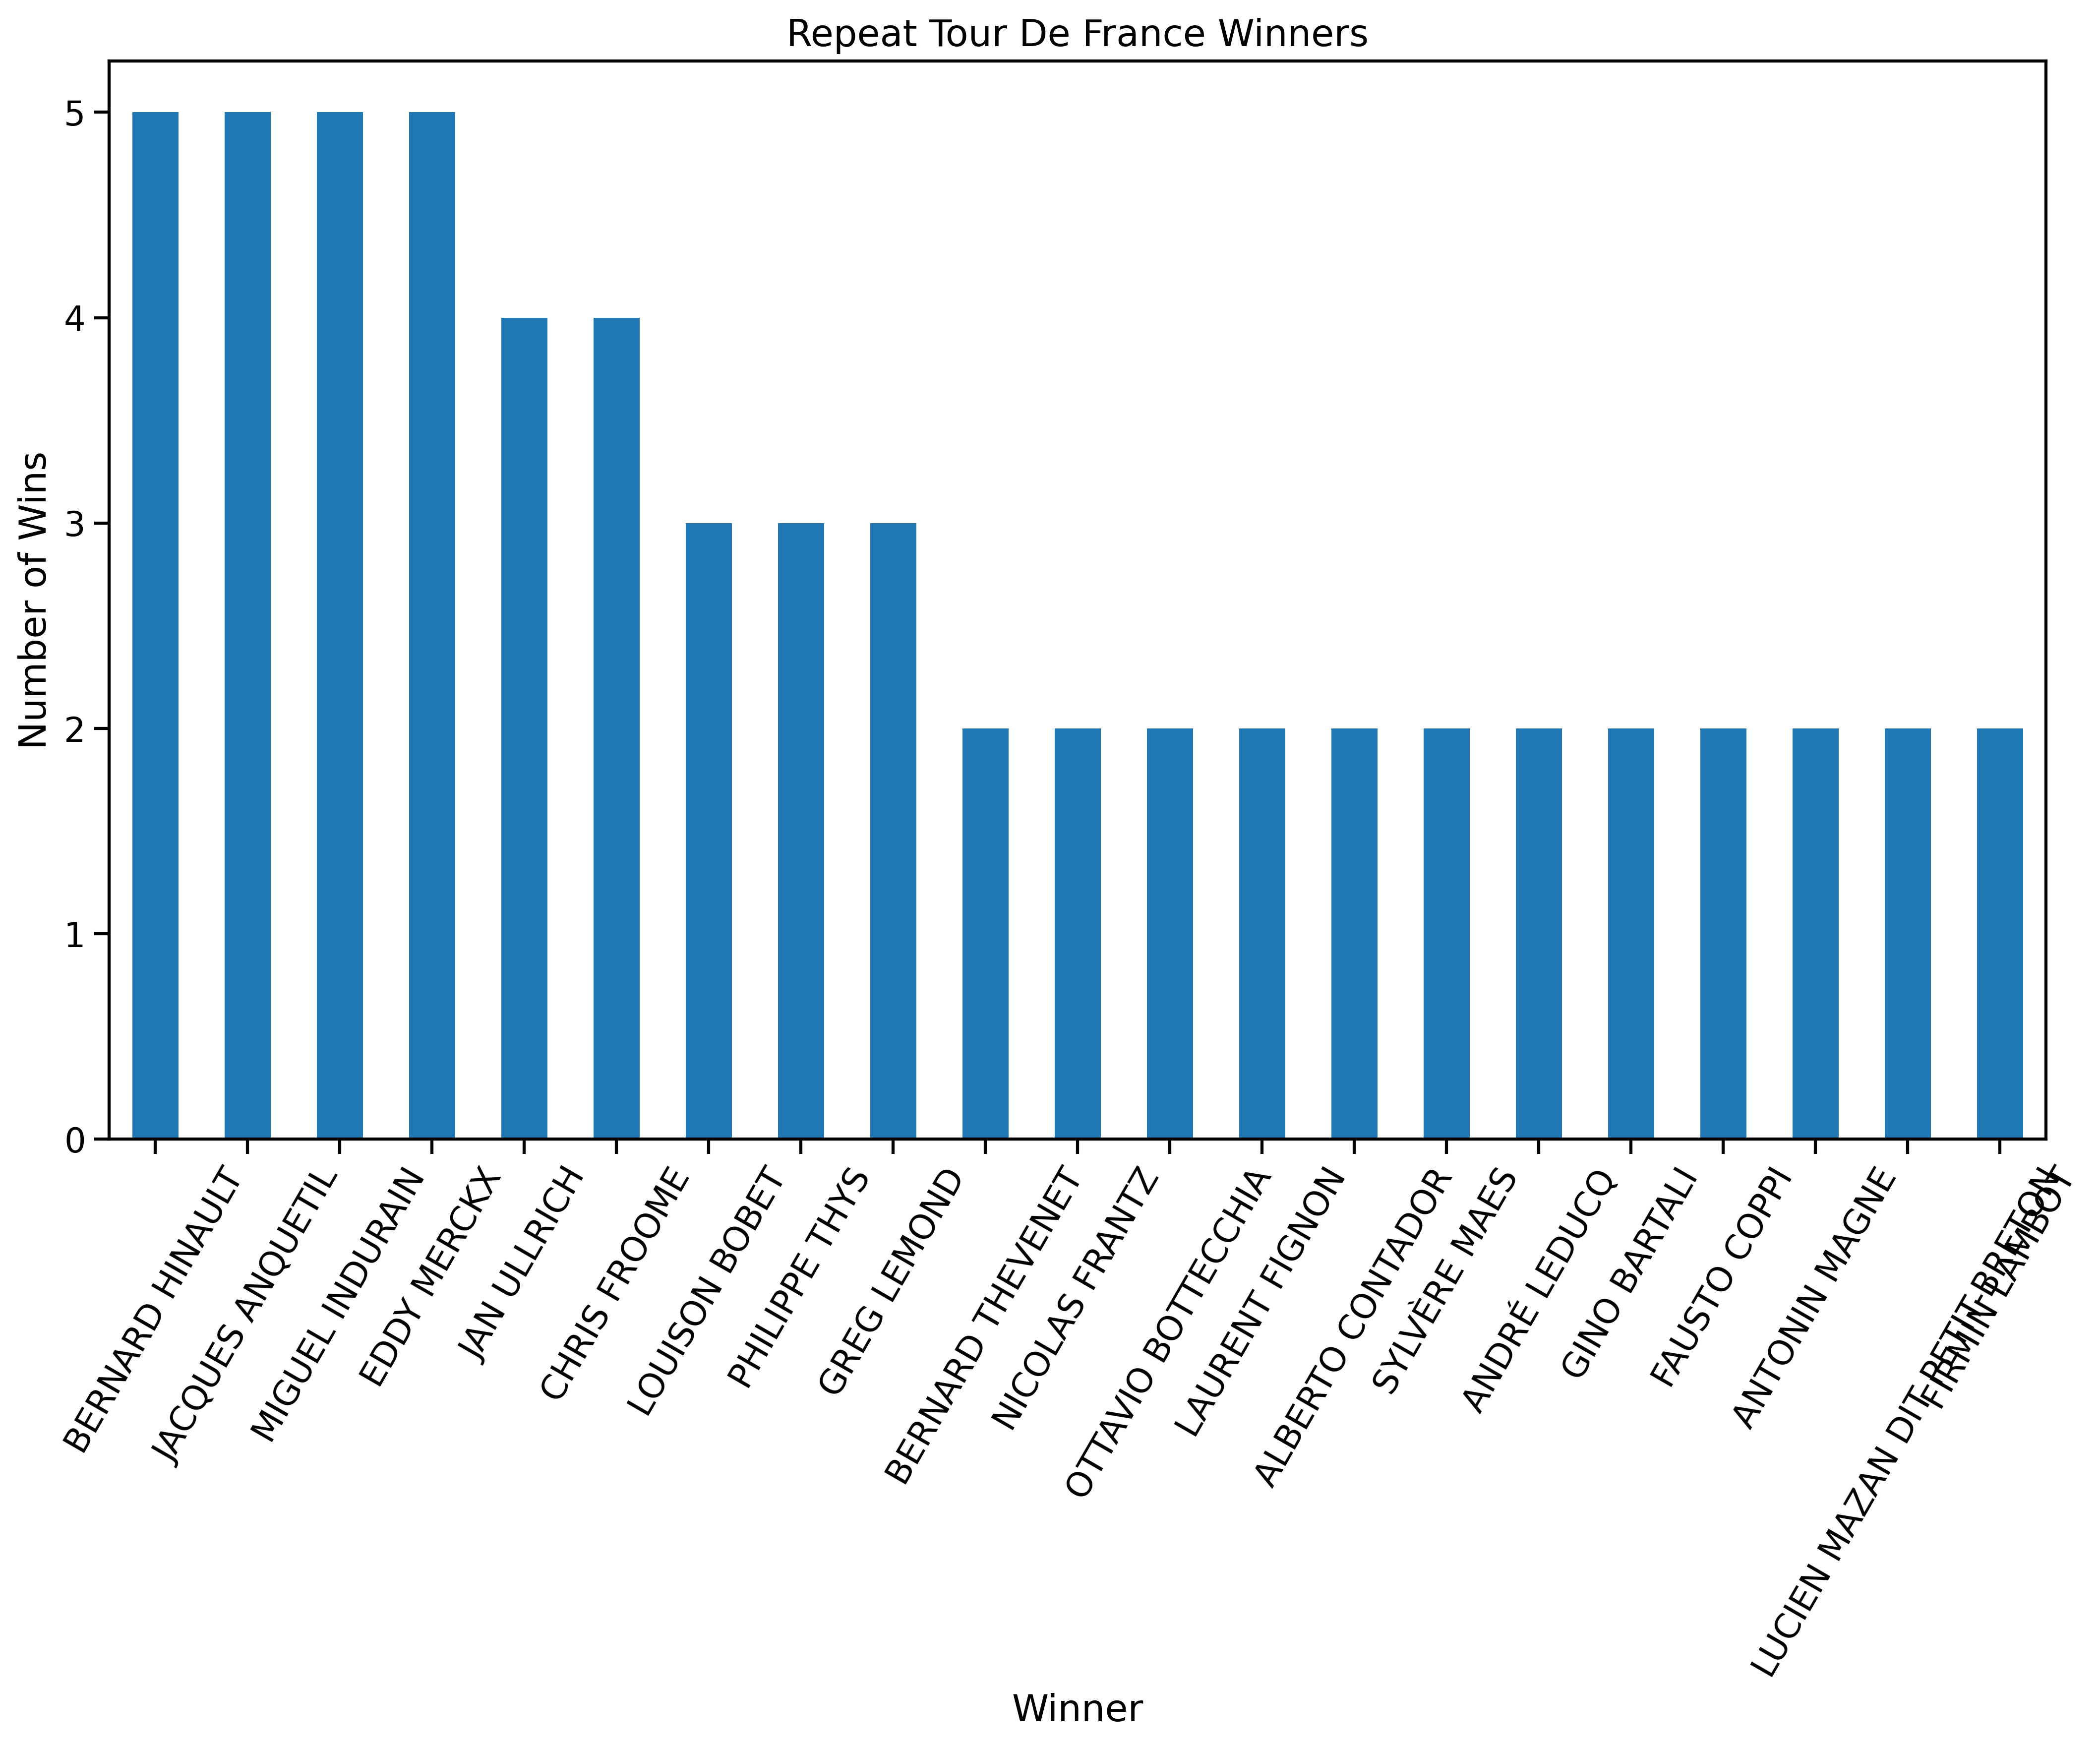

In [ ]:
merged_df['Winner'].value_counts().loc[lambda x : x>1]


ax = merged_df['Winner'].value_counts().loc[lambda x : x>1].plot(kind='bar',
                                        figsize=(14,8),
                                        title="Repeat Tour De France Winners")
ax.set_xlabel("Winner")
#lets make it easier to read
degrees = 60
plt.xticks(rotation=degrees)
ax.set_ylabel("Number of Wins")

Text(0.5, 1.0, 'Repeat Tour De France Winner')

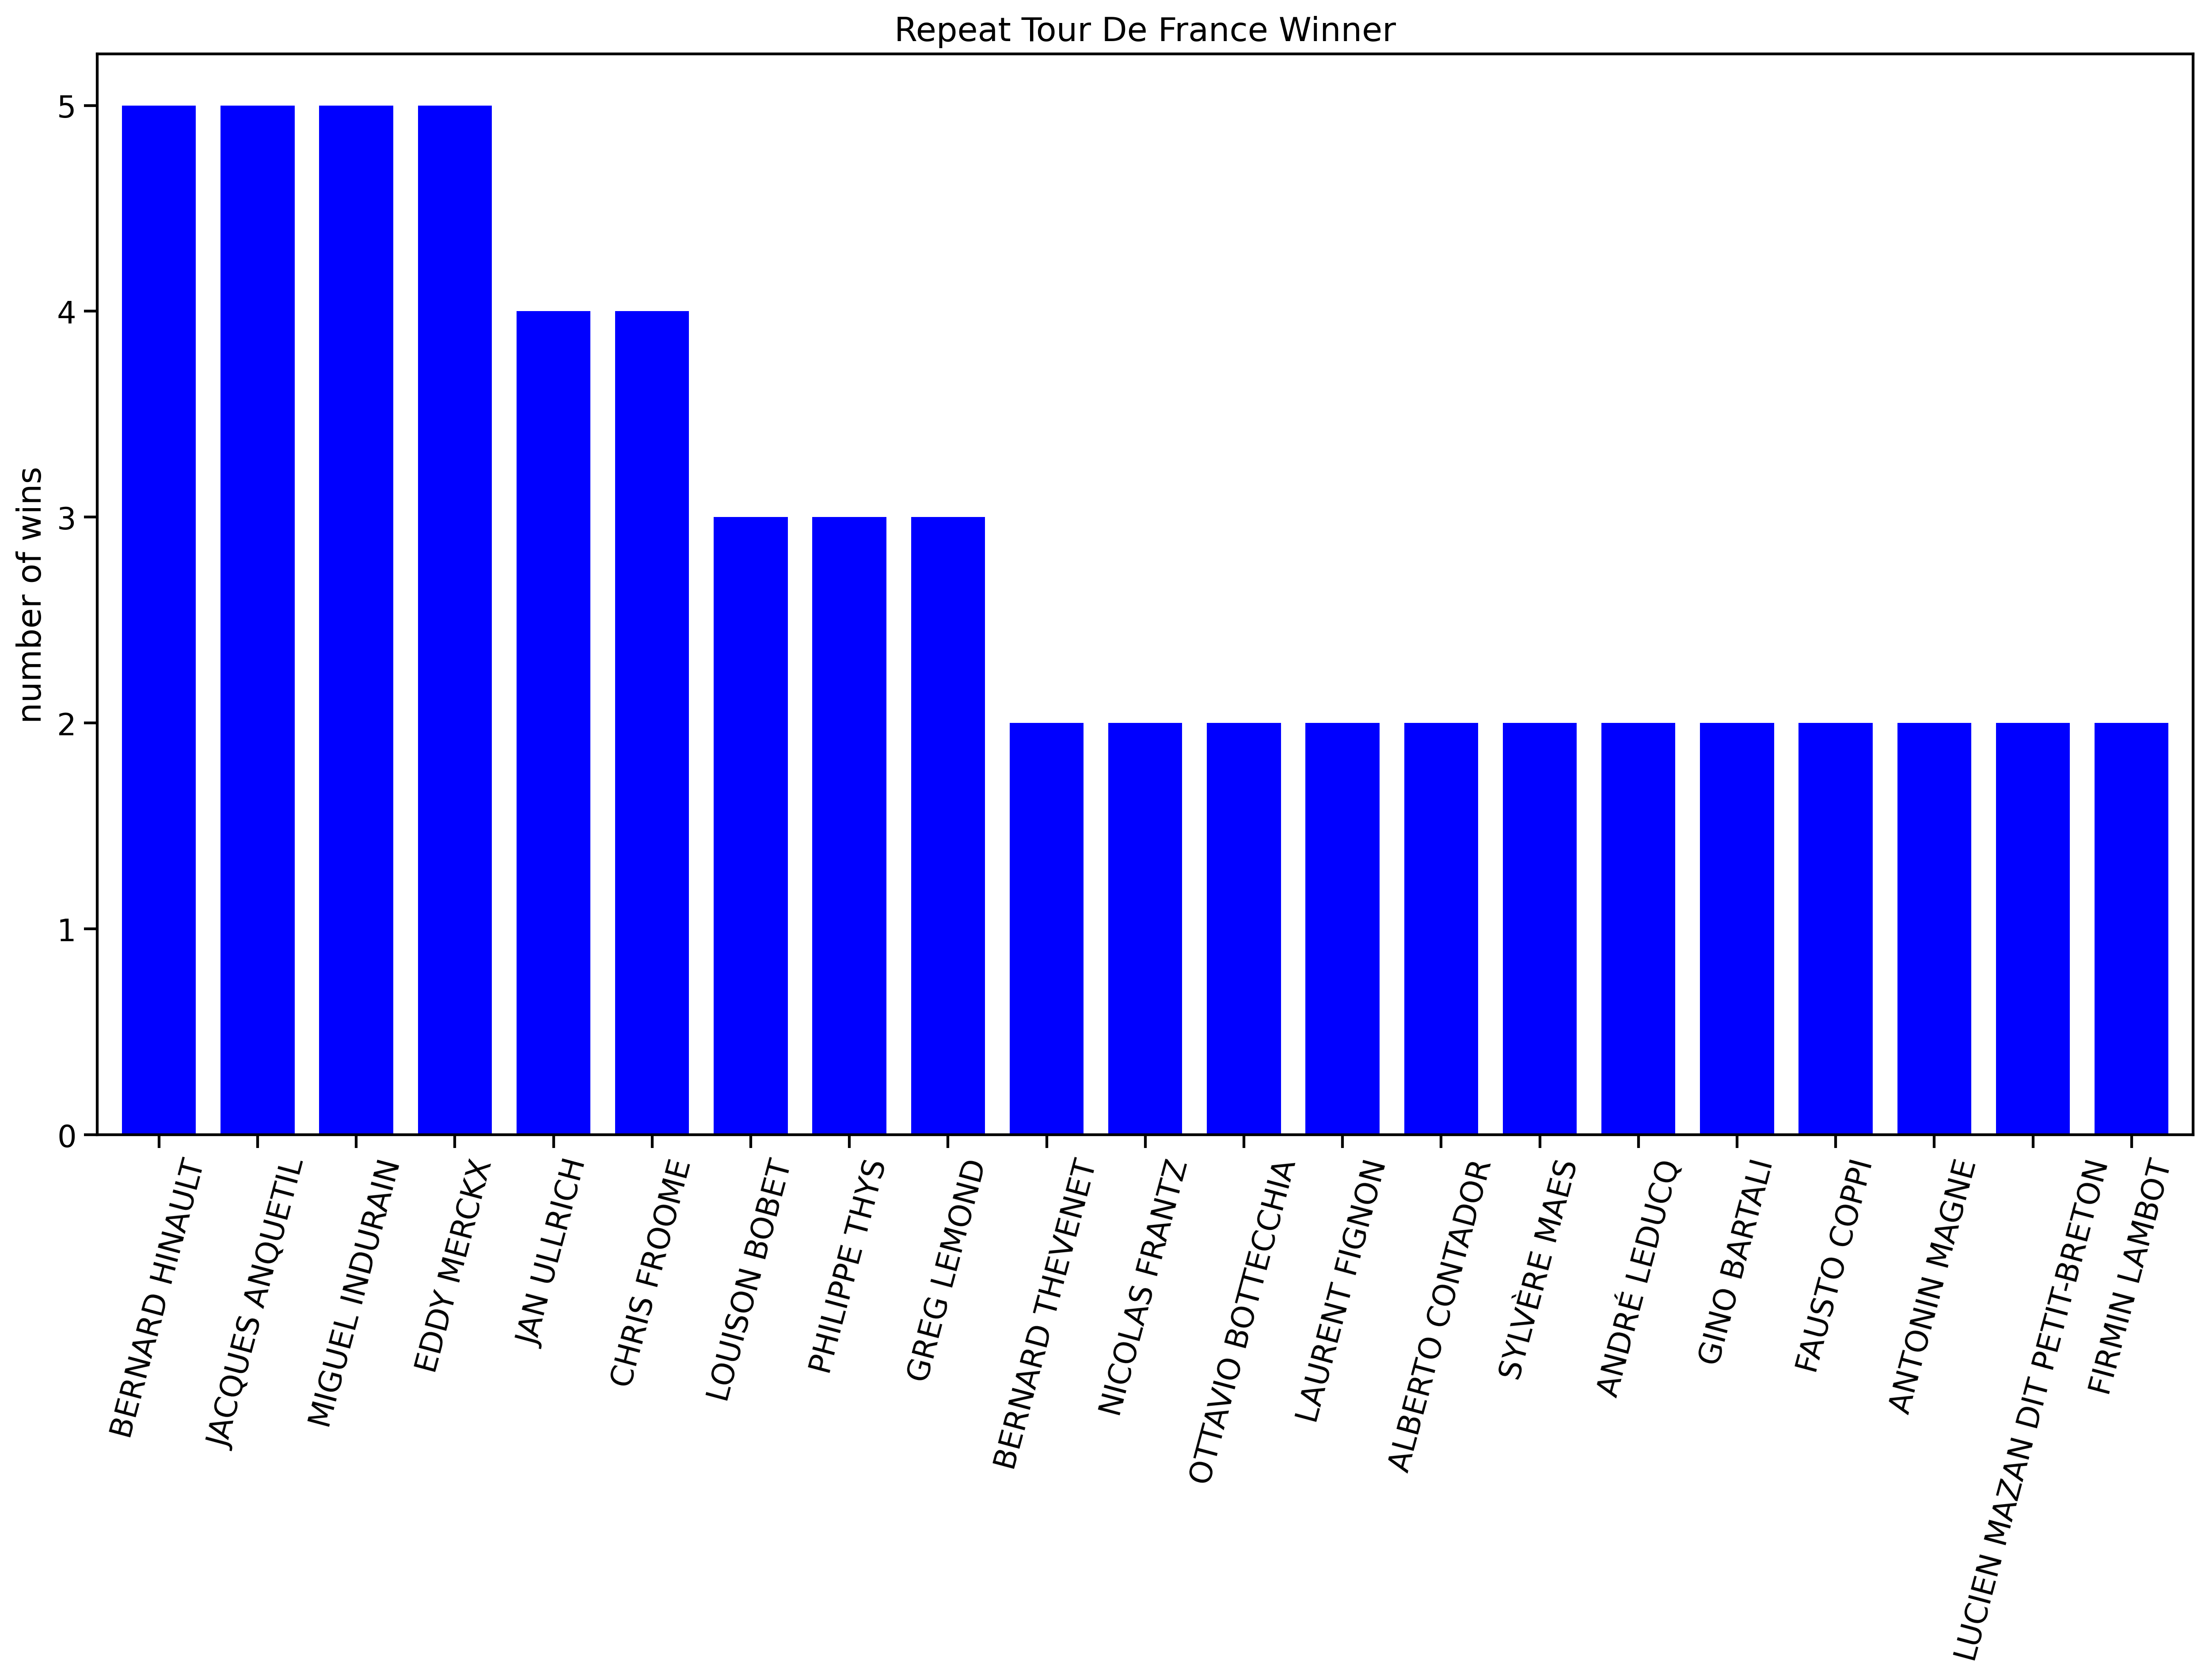

In [ ]:
merged_df['Winner'].value_counts().loc[lambda x : x>1].plot(kind='bar', align='center', width = .75,  figsize=(17,9), color=['blue']);

plt.ylabel('number of wins')
#lets make it easier to read
degrees = 75
plt.xticks(rotation=degrees)
plt.title('Repeat Tour De France Winner')


**Scatter plot**

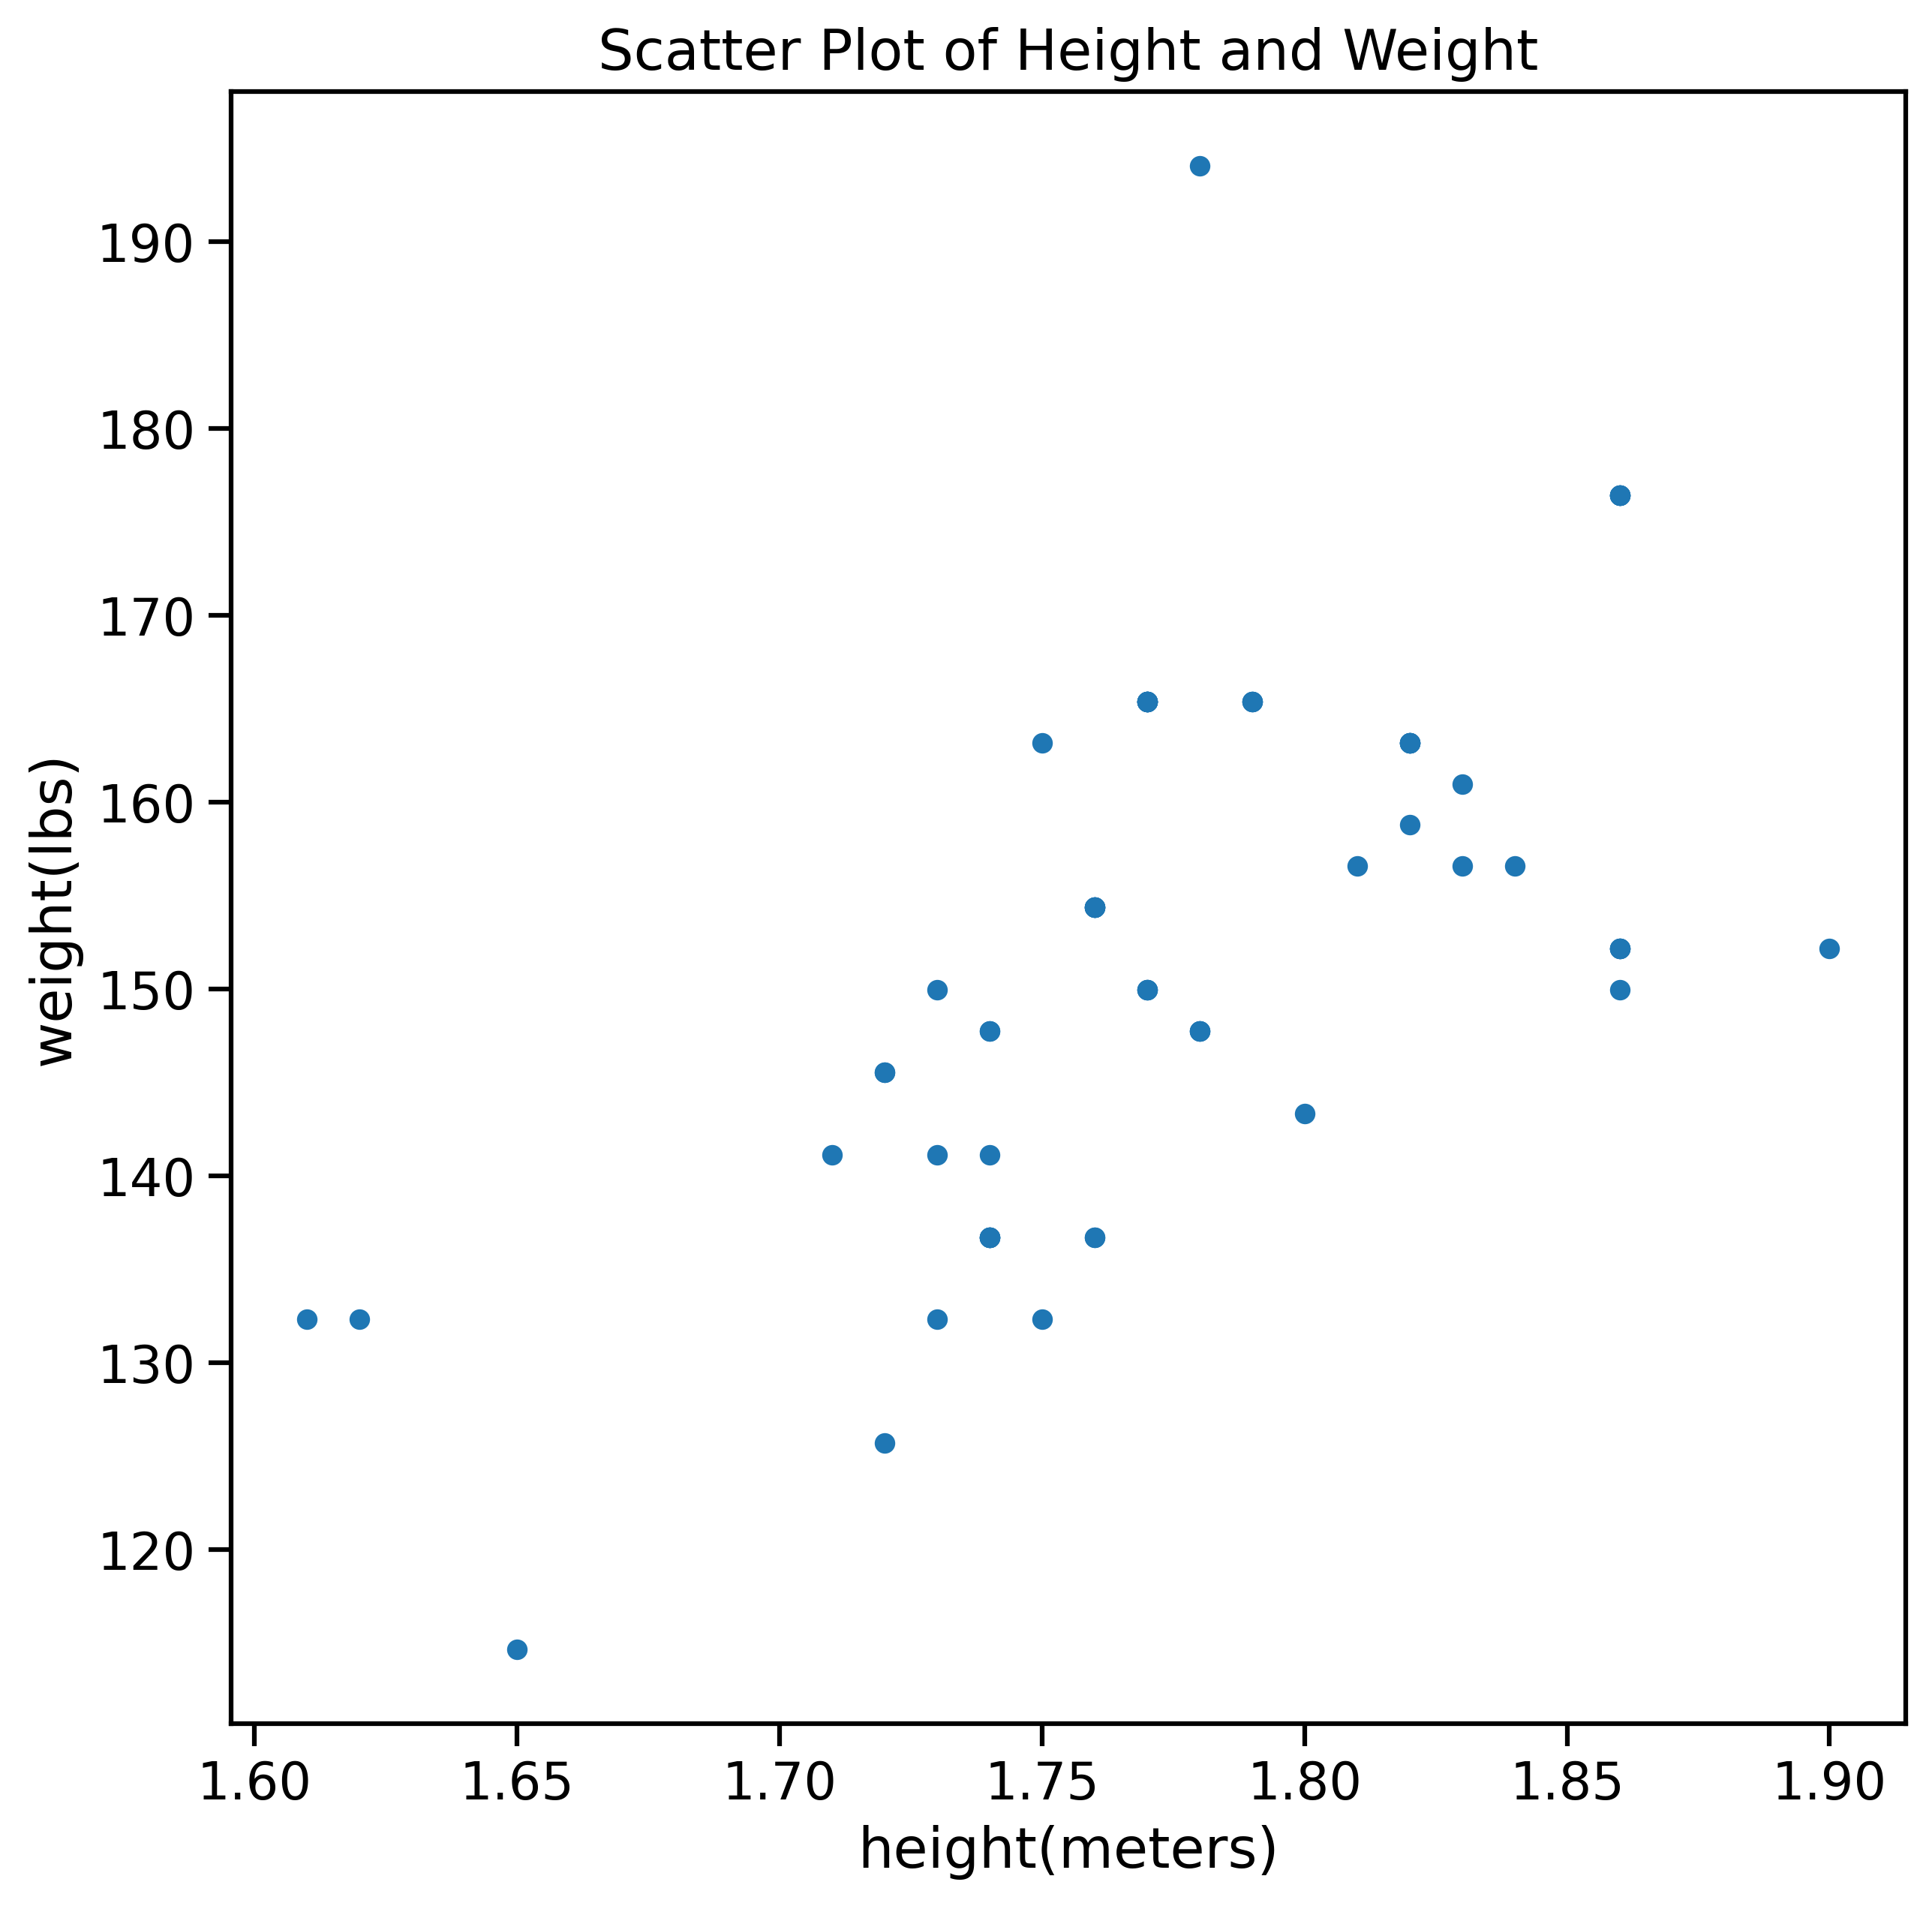

In [ ]:
#matplotlib scatter 

ax1 = merged_df.plot.scatter(x='height(meters)',
                      y='weight(lbs)', figsize=(8,8), title='Scatter Plot of Height and Weight')


In [ ]:
heaviest_winner = merged_df.loc[(merged_df["weight(lbs)"] > 190)]
print(heaviest_winner)

   Year  distance (miles)  ...  nationality weight(lbs)
6  1909       2794.903667  ...   Luxembourg      194.04

[1 rows x 16 columns]


In [ ]:
merged_df.head(7)

Year  distance (miles)  ...  nationality weight(lbs)
0  1903       1509.011809  ...       France      132.30
1  1904       1509.011809  ...       France         NaN
2  1905       1860.783095  ...       France         NaN
3  1906       2881.914232  ...       France         NaN
4  1907       2789.310131  ...       France         NaN
5  1908       2789.310131  ...       France         NaN
6  1909       2794.903667  ...   Luxembourg      194.04

[7 rows x 16 columns]

In [ ]:
winners_df.head(7)

Year                Rider  ...  nationality  weight(lbs)
0  1903        MAURICE GARIN  ...       France       132.30
1  1904         HENRI CORNET  ...       France          NaN
2  1905    LOUIS TROUSSELIER  ...       France          NaN
3  1906         RENÉ POTTIER  ...       France          NaN
4  1907  LUCIEN PETIT-BRETON  ...       France          NaN
5  1908  LUCIEN PETIT-BRETON  ...       France          NaN
6  1909       FRANÇOIS FABER  ...   Luxembourg       194.04

[7 rows x 12 columns]

Text(1.68, 193, 'Francois Faber')

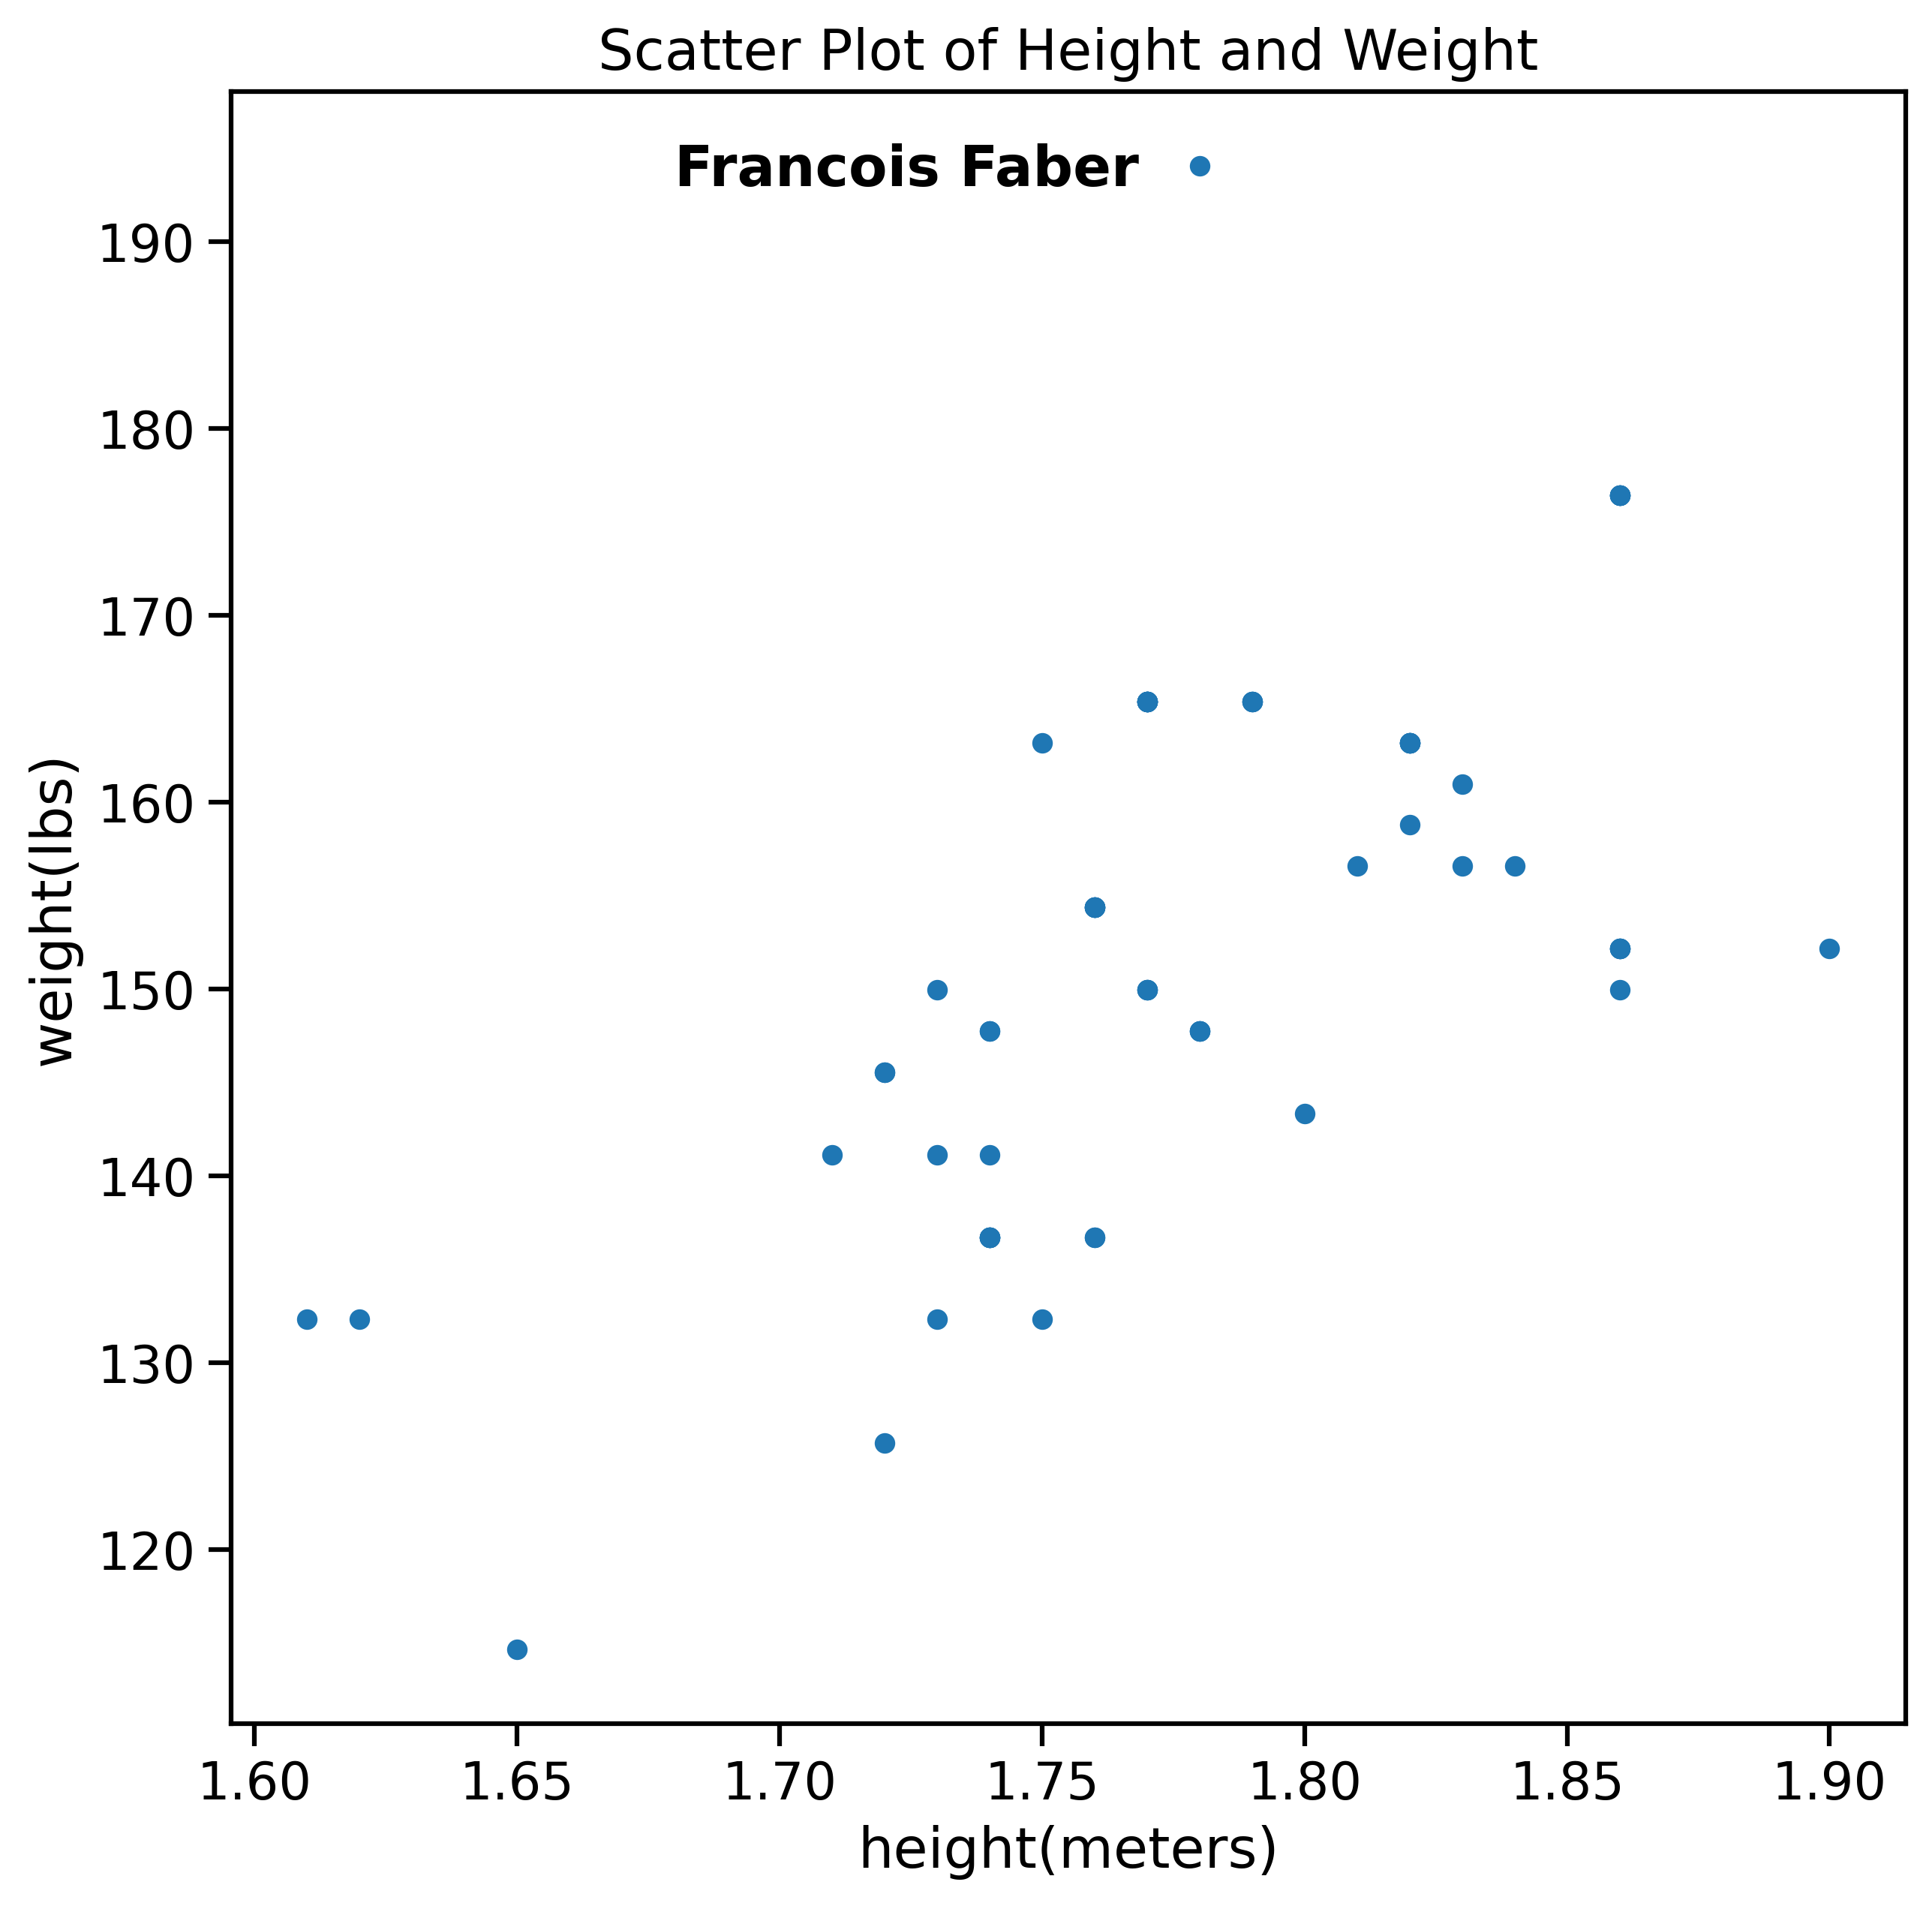

In [ ]:
#scatterplot with annotation

ax1 = merged_df.plot.scatter(x='height(meters)',
                      y='weight(lbs)', figsize=(8,8), title='Scatter Plot of Height and Weight')

plt.text(1.68,193, "Francois Faber", horizontalalignment='left', size='medium', color='black', weight='semibold')

**Looking at the [age/height/weight] of winners (average/histrogram/trendlines)**

this other dataset contains age, lets break that down a bit with average, trendlines and historgrams

In [ ]:
merged_df["age"].mean()

27.71698113207547

In [ ]:
merged_df.tail(10)

Year  distance (miles)  winnerpace  ...     nationality  weight(lbs)  count
97   2011       2256.059664      42.108  ...       Australia      141.120      1
98   2012       2173.399627      39.929  ...   Great Britain      152.145      1
99   2013       2115.599751      40.551  ...   Great Britain      152.145      1
100  2014       2274.083282      40.662  ...           Italy      143.325      1
101  2015       2084.524549      39.566  ...   Great Britain      152.145      1
102  2016       2190.801740      39.571  ...   Great Britain      152.145      1
103  2017       2200.124301      40.997  ...   Great Britain      152.145      1
104  2018       2081.417029      40.210  ...   Great Britain      156.555      1
105  2019       2091.982598      40.579  ...        Colombia      132.300      1
106  2020       2091.982598      38.541  ...             NaN          NaN      1

[10 rows x 17 columns]

In [ ]:
mean_winner_age = merged_df["age"].mean()
mean_winner_height = merged_df["height(meters)"].mean()
mean_winner_weight = merged_df["weight(lbs)"].mean()
mean_winner_stage_wins = merged_df["stages_led"].mean()

print("the avearge Tour De Fance winner is: {:.0f} years old, {:.2f} meters tall, and weighs {:.1f} pounds. They tend to lead the pack in roughly {:.0f} stages each tour.".format(mean_winner_age, mean_winner_height, mean_winner_weight, mean_winner_stage_wins))

the avearge Tour De Fance winner is: 28 years old, 1.78 meters tall, and weighs 152.7 pounds. They tend to lead the pack in roughly 11 stages each tour.


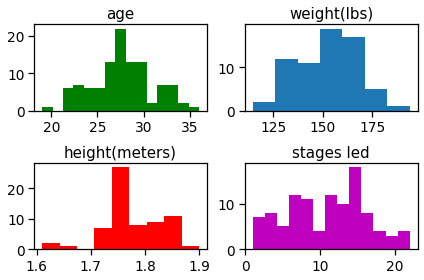

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(merged_df['age'], color='g', bins=15)
axs[0, 0].set_title("age")
axs[1, 0].hist(merged_df['height(meters)'],color='r', bins=9)
axs[1, 0].set_title("height(meters)")
#axs[1, 0].sharex(axs[0, 0])
axs[0, 1].hist(merged_df['weight(lbs)'], bins=7)
axs[0, 1].set_title("weight(lbs)")
axs[1, 1].hist(merged_df['stages_led'],color='m', bins=13)
axs[1, 1].set_title("stages led")
fig.tight_layout()

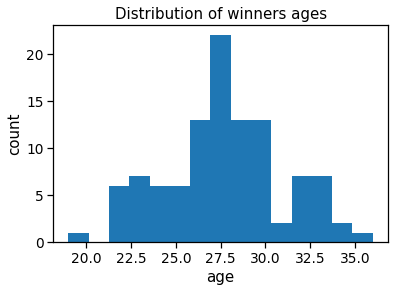

In [ ]:
merged_df.age.plot.hist(bins=15)
plt.title("Distribution of winners ages")
plt.ylabel('count')
plt.xlabel('age');

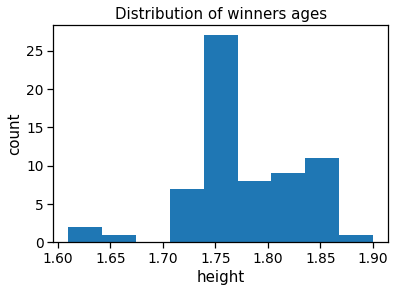

In [ ]:
merged_df['height(meters)'].plot.hist(bins=9)
plt.title("Distribution of winners ages")
plt.ylabel('count')
plt.xlabel('height');

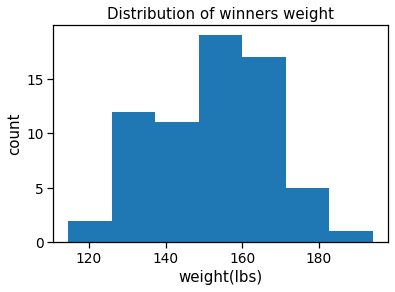

In [ ]:
merged_df['weight(lbs)'].plot.hist(bins=7)
plt.title("Distribution of winners weight")
plt.ylabel('count')
plt.xlabel('weight(lbs)');

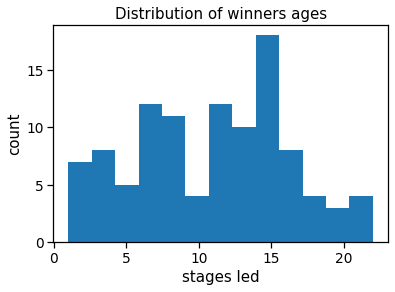

In [ ]:
merged_df['stages_led'].plot.hist(bins=13)
plt.title("Distribution of winners ages")
plt.ylabel('count')
plt.xlabel('stages led');

**Boxplot of winner ages by nationality**

Good opportunity for anomaly detection

In [ ]:
merged_df['nationality'].value_counts()[:10]

 France           36
 Belgium          18
 Spain            12
 United States    10
 Italy            10
 Great Britain     6
 Luxembourg        5
  Switzerland      2
 Netherlands       2
 Colombia          1
Name: nationality, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



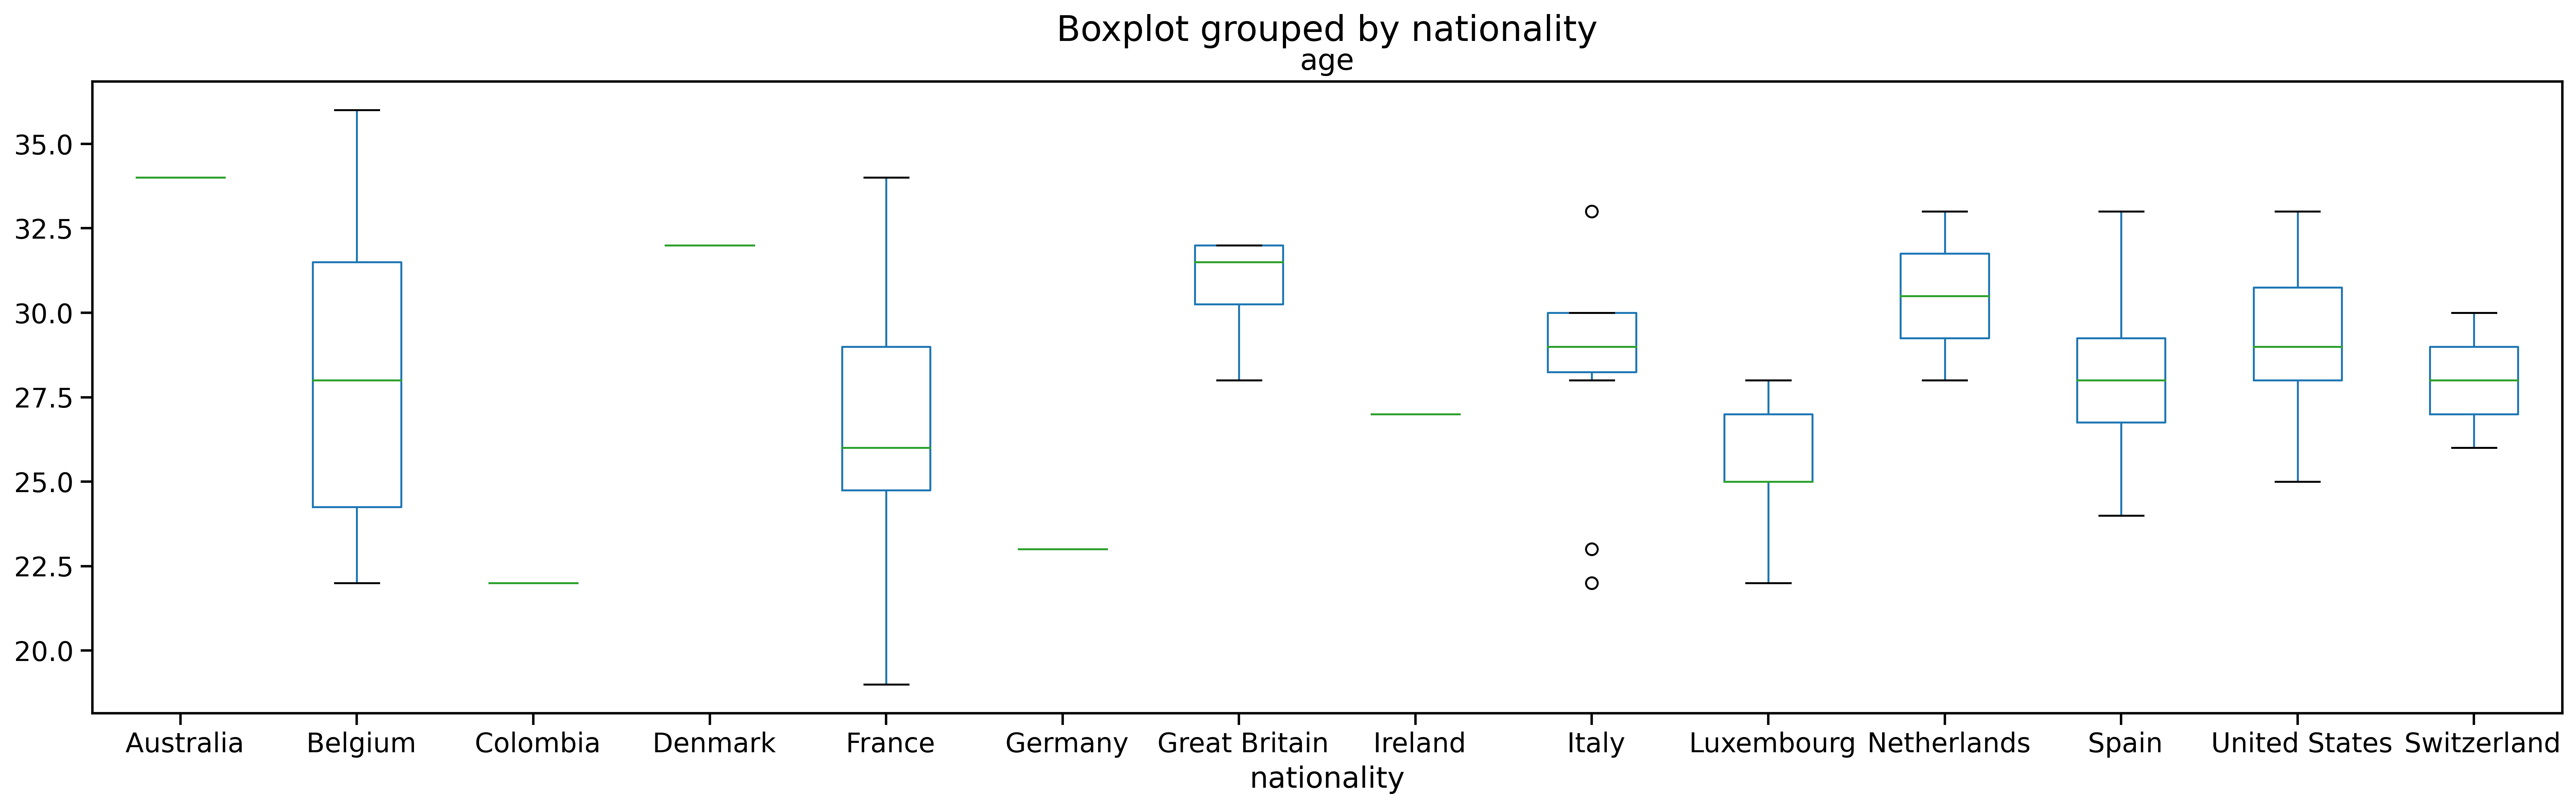

In [ ]:
merged_df.boxplot(by='nationality', 
                       column=['age'], figsize=fig_dims,
                       grid=False)

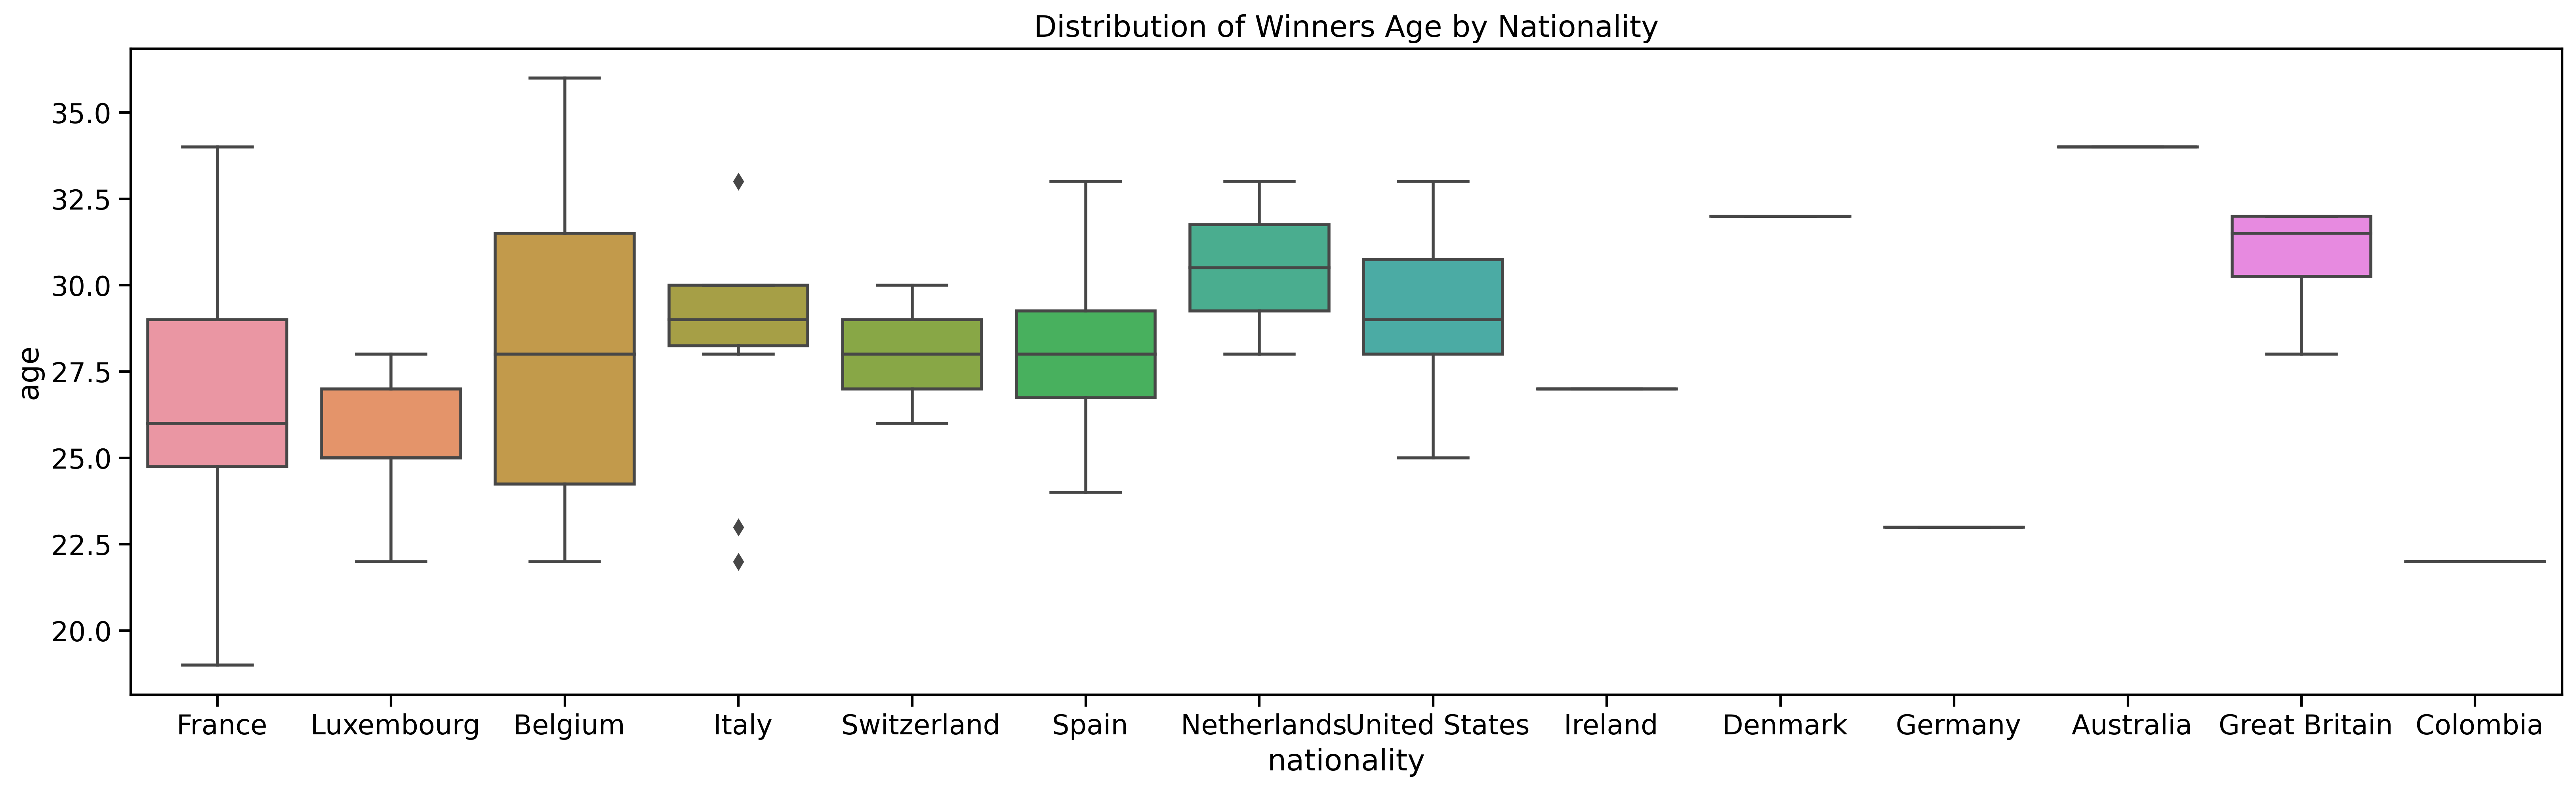

In [ ]:
fig_dims = (22, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x="nationality", y="age", data=merged_df)
plt.title("Distribution of Winners Age by Nationality")
plt.show()

**Graphing with plotly**

In [ ]:
fig = px.line(merged_df, x="Year", y="age")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
          )
)

fig.show()

# Next Steps & Future Analysis

As mentioned earlier, this project clearly just scratches the surface of analysis that can be done on this data set. Some other things I'd like to add or try to this project:

*   Color or highlight certain points in the winners chart for callouts
*   Predicting/forecasting - and charting - winner pace for next 10/15 years (based on data). The primary goal of time sereis analysis is forecasting
*   Anomoly detection (and explanation)
*   Building out a multiple linear regression model to predict the pace of a rider based on factors such as height, weight, age, and nationality


With the advent of analytics touching every sport, [including cycling](https://www.forbes.com/sites/joshualaw/2020/08/26/moneyball-at-the-tour-de-france-how-ntt-is-bringing-analytics-to-pro-cycling/?sh=62b63a19a3b7), more interesting and complex analyses bringing in biometric data, weather, bike types, and more will create even more interesting and hopefully impactful insights in tour de france data analysis.



# Data Sources

These URLs contain the raw data files used to conduct the above analysis


*   https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv 
*   https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv




# Extra Resources


The below list is a collection of help sites and resources I came across when conducting this analysis

*  Time series mpatlot: https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
*   [Pandas dataframe cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
*   Labels and annotations https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*   [Reading and writing CSV files in Python](stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas/)
*  Line plot graphs with matplotlib (youtube) https://www.youtube.com/watch?v=AYorFcI1MTU
*  Dot plots in plotly https://plotly.com/python/dot-plots/
*   Matplotlib bar charts https://pythonspot.com/matplotlib-bar-chart/
*   More time series: https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
*  Plotting two charts with different scales:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
*   Dropping first column of data from a data frame https://thispointer.com/pandas-delete-first-column-of-dataframe-in-python/
*   Getting multiple axes to return a single label https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
*   Matplot lib style sheet https://www.python-graph-gallery.com/199-matplotlib-style-sheets
*   Plotly https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e


*   Plotly (line charts) https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
*   Plotly (text and annotations) https://plotly.com/python/text-and-annotations/
*   Time series analysis (wikipedia) https://en.wikipedia.org/wiki/Time_series

*   Merging dataframes https://www.youtube.com/watch?v=h4hOPGo4UVU




In [ ]:
winners_df.groupby(['nationality']).mean().sort_values('height(meters)', ascending=False)['height(meters)']

KeyError: ignored

# Additional Tour De France Analysis

The Below list includes other forms of Tour De France data analysis

*   https://technology.amis.nl/data-analytics/tour-de-france-data-analysis-using-strava-data-in-jupyter-notebook-with-python-pandas-and-plotly-step-1-single-rider-loading-exploration-wrangling-visualization/
*   https://imgur.com/gallery/hKDOT5Y
*   [A Brief History of Tour De France in Numbers](https://www.kaggle.com/jaminliu/a-brief-tour-of-tour-de-france-in-numbers)
*   https://medium.com/@Ben_Obe/a-brief-look-at-le-tour-de-france-through-the-lense-of-data-c6dc4a68f0c6
*   https://gist.github.com/cavedave/8115b0f5a74f4e088315587e5bdaa4b3
*   http://maiapelletier.rbind.io/post/tidytuesday-tour-de-france-winners/



#Radar Chart


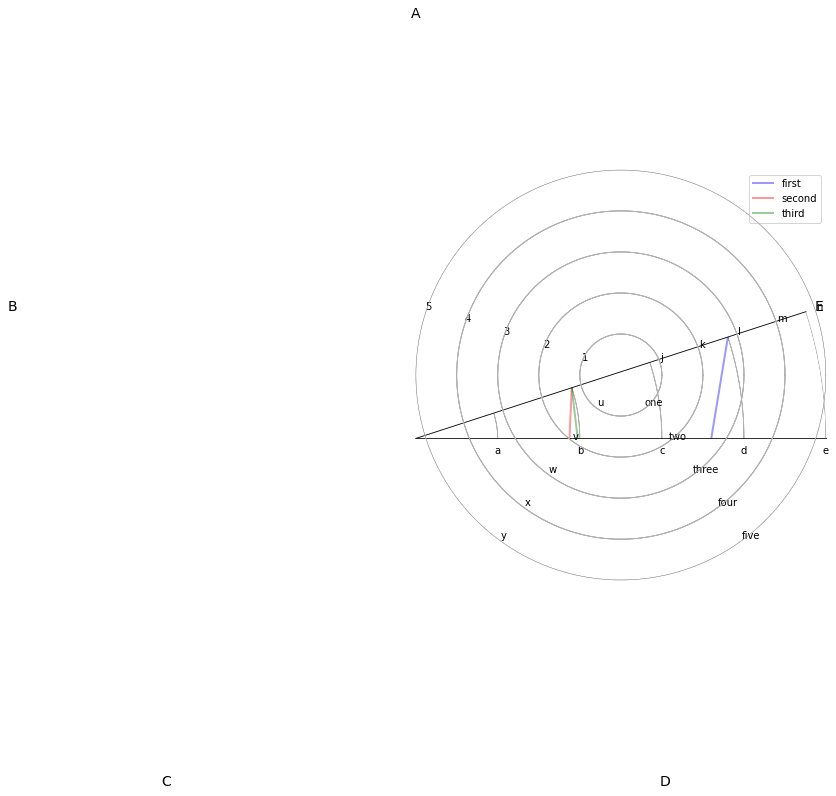

In [ ]:
#https://stackoverflow.com/questions/24659005/radar-chart-with-multiple-scales-on-multiple-axes

import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(6, 6))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")

radar.ax.legend()

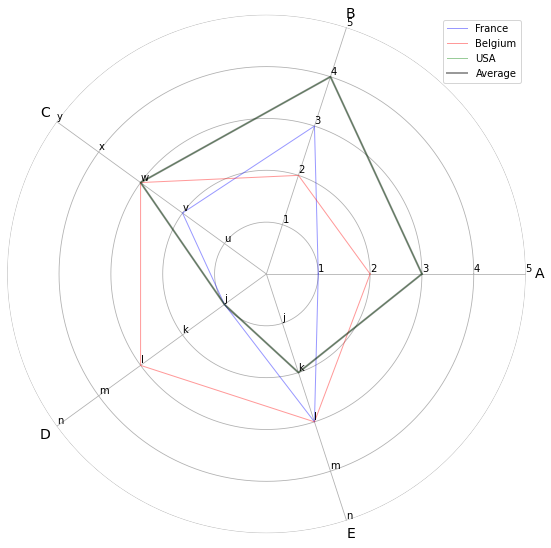

In [ ]:

#https://gist.github.com/geberl/c65517bf8273552486f9a8954e80ddf4

import numpy as np
import matplotlib.pyplot as plt

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)


if __name__ == '__main__':
    fig = plt.figure(figsize=(8, 8))

    tit = list('ABCDE') 

    lab = [
        list('12345'),
        list('12345'),
        list('uvwxy'),
        list('jklmn'),
        list('jklmn')
    ]

    radar = Radar(fig, tit, lab)
    radar.plot([1, 3, 2, 1, 3],  '-', lw=1, color='b', alpha=0.4, label='France')
    radar.plot([2, 2, 3, 3, 3], '-', lw=1, color='r', alpha=0.4, label='Belgium')
    radar.plot([3, 4, 3, 1, 2], '-', lw=1, color='g', alpha=0.4, label='USA')
    radar.plot([3, 4, 3, 1, 2], '-', lw=2, color='k', alpha=0.4, label='Average')
    radar.ax.legend()


In [ ]:
#get the avearges to normalize 

merged_df.groupby(['nationality']).mean()

Year  distance (miles)  ...        age  weight(lbs)
nationality                                    ...                        
 Australia      2011.000000       2256.059664  ...  34.000000   141.120000
 Belgium        1939.888889       2964.367102  ...  28.000000   157.290000
 Colombia       2019.000000       2091.982598  ...  22.000000   132.300000
 Denmark        1996.000000       2339.962710  ...  32.000000   156.555000
 France         1947.305556       2648.694842  ...  26.527778   148.347500
 Germany        1997.000000       2454.940957  ...  23.000000   160.965000
 Great Britain  2015.166667       2140.977833  ...  30.833333   152.880000
 Ireland        1987.000000       2629.583592  ...  27.000000   163.170000
 Italy          1957.300000       2864.014916  ...  28.300000   145.215000
 Luxembourg     1946.400000       2900.186451  ...  25.400000   161.700000
 Netherlands    1974.000000       2589.807334  ...  30.500000   149.940000
 Spain          1992.916667       2341.205718  ...  28.083333   153.949091
 United States  1997.900000       2210.192666  ...  29.200000   160.083000
  Switzerland   1950.500000       2940.646364  ...  28.000000          NaN

[14 rows x 12 columns]

In [ ]:
#creating our dataframe

radar_df = pd.DataFrame(merged_df.groupby(['nationality']).mean())

radar_df.head()

Year  distance (miles)  ...        age  weight(lbs)
nationality                                 ...                        
 Australia   2011.000000       2256.059664  ...  34.000000     141.1200
 Belgium     1939.888889       2964.367102  ...  28.000000     157.2900
 Colombia    2019.000000       2091.982598  ...  22.000000     132.3000
 Denmark     1996.000000       2339.962710  ...  32.000000     156.5550
 France      1947.305556       2648.694842  ...  26.527778     148.3475

[5 rows x 12 columns]

In [ ]:
#do a linear transformation given the different scales 

In [ ]:
#https://www.pythoncharts.com/matplotlib/radar-charts/

factors = ['meanpace', 'stage_wins', 'height(meters)', 'age', 'weight(lbs)']

# New scale should be from 0 to 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Do a linear transformation on each variable to change value
# to [0, 100].
for factor in factors:
  max_val = radar_df[factor].max()
  min_val = radar_df[factor].min()
  val_range = max_val - min_val
  radar_df[factor + '_Adj'] = radar_df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [ ]:
dft = radar_df.loc[:, ['nationality', 'meanpace_Adj', 'stage_wins_Adj',
                 'height(meters)_Adj', 'age_Adj',
                 'weight(lbs)_Adj']]

dft.rename(columns={
    'meanpace_Adj': 'meanpace',
    'stage_wins_Adj': 'stage_wins',
    'height(meters)_Adj': 'height(meters)',
    'age_Gallon_Adj': 'age',
    'weight(lbs)_Adj': 'weight(lbs)'
}, inplace=True)

dft.set_index('nationality')

KeyError: ignored